# <font color='CC3D3D'>데이터 불러오기

In [371]:
#기본 패키지
import time
import warnings
warnings.filterwarnings('ignore')

#데이터 처리 패키지
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user
from matplotlib import rc 
rc('font', family='malgun gothic')
rc('axes', unicode_minus = False)
import seaborn as sns
plt.style.use('ggplot')

#수학 패키지
from scipy.stats.mstats import gmean
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import uuid
import random
from tqdm import tqdm, tqdm_notebook
from itertools import combinations

#머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.linear_model import BayesianRidge
from vecstack import stacking, StackingTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse

#딥러닝 패키지
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import * #Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
#from keras.utils.np_utils import *
#from tensorflow.keras.utils.vis_utils import * #model_to_dot
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import *
from tensorflow.keras import layers
print('tf Version \n', tf.__version__)
print('tf.keras Version \n', tf.keras.__version__)

#import kerastuner as kt
import datetime
import os
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

import shap

import klib
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss

tf Version 
 2.6.0
tf.keras Version 
 2.6.0


In [4]:
train = pd.read_csv('L.POINT_train.csv', encoding='UTF-8')
test = pd.read_csv('L.POINT_test.csv', encoding='UTF-8')

In [5]:
train['PD_BUY_AM']  = train['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
train['PD_BUY_CT']  = train['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
train['TOT_SESS_HR_V']  = train['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',','')) )

test['PD_BUY_AM']  = test['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_CT']  = test['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
test['TOT_SESS_HR_V']  = test['TOT_SESS_HR_V'].map(lambda x: int(str(x).replace(',','')) )

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948686 entries, 0 to 1948685
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CLNT_ID          int64  
 1   SESS_ID          int64  
 2   HITS_SEQ         int64  
 3   PD_C             int64  
 4   PD_ADD_NM        object 
 5   PD_BRA_NM        object 
 6   PD_BUY_AM        int64  
 7   PD_BUY_CT        int64  
 8   SESS_SEQ         int64  
 9   SESS_DT          int64  
 10  TOT_PAG_VIEW_CT  float64
 11  TOT_SESS_HR_V    int64  
 12  DVC_CTG_NM       object 
 13  ZON_NM           object 
 14  CITY_NM          object 
 15  KWD_NM           object 
 16  SEARCH_CNT       int64  
 17  PD_NM            object 
 18  CLAC1_NM         object 
 19  CLAC2_NM         object 
 20  CLAC3_NM         object 
dtypes: float64(1), int64(10), object(10)
memory usage: 312.2+ MB


# NA Values

결측치 확인

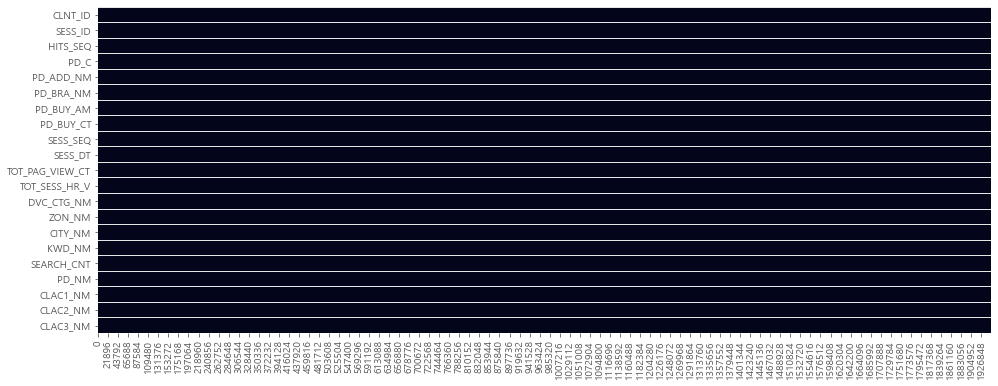

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

In [ ]:
train.isnull().sum().to_frame()

,0
CLNT_ID,0
SESS_ID,0
HITS_SEQ,0
PD_C,0
PD_ADD_NM,0
PD_BRA_NM,0
PD_BUY_AM,0
PD_BUY_CT,0
SESS_SEQ,0
SESS_DT,0


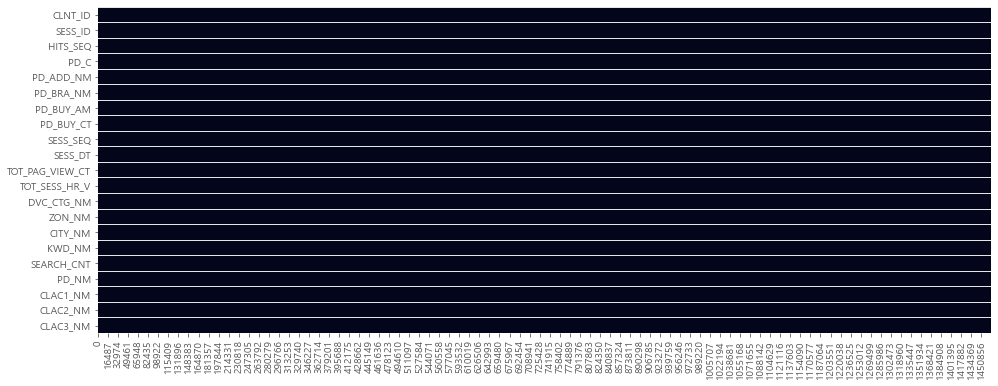

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [ ]:
test.isnull().sum().to_frame()

,0
CLNT_ID,0
SESS_ID,0
HITS_SEQ,0
PD_C,0
PD_ADD_NM,0
PD_BRA_NM,0
PD_BUY_AM,0
PD_BUY_CT,0
SESS_SEQ,0
SESS_DT,0


# 수치형 변수 분포확인

In [ ]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

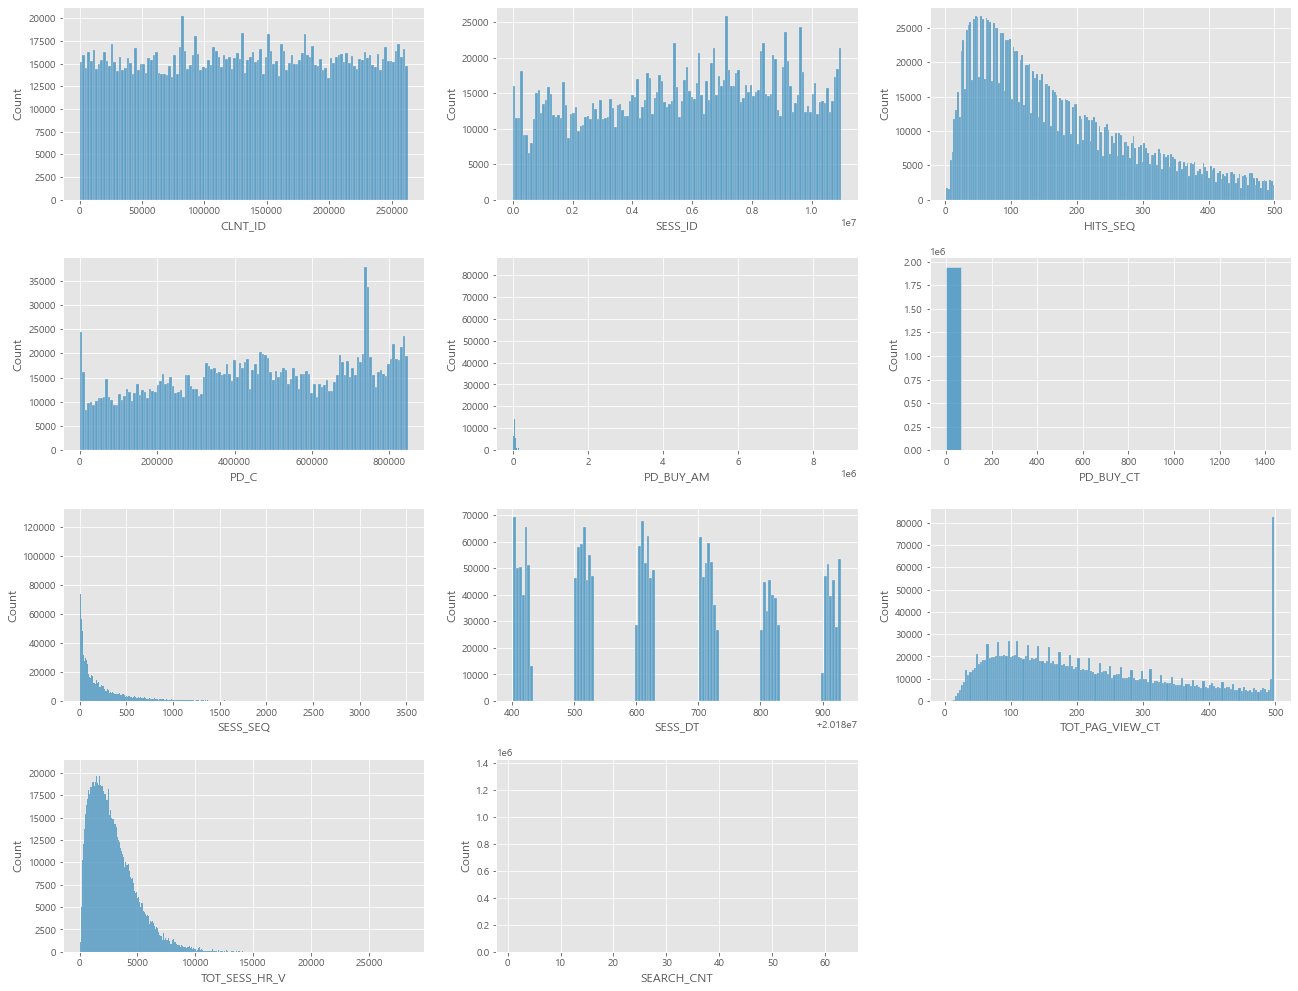

In [ ]:
fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='SEARCH_CNT', ylabel='Density'>

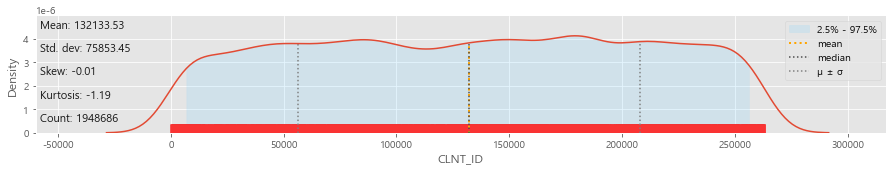

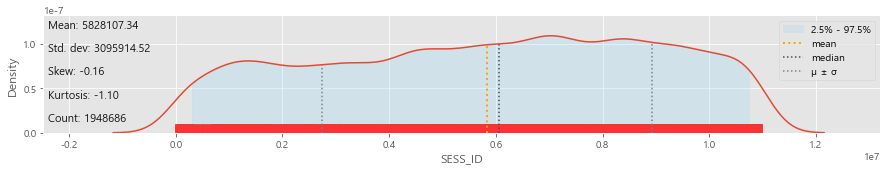

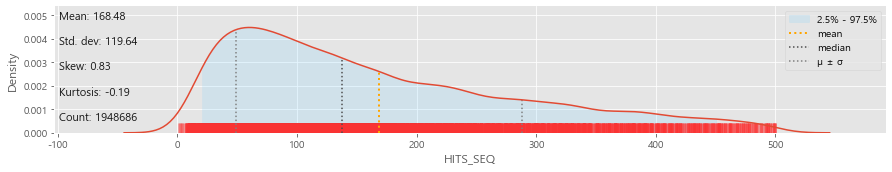

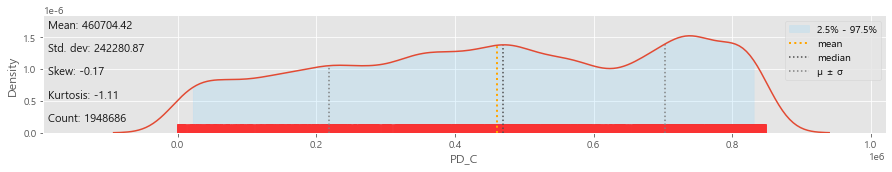

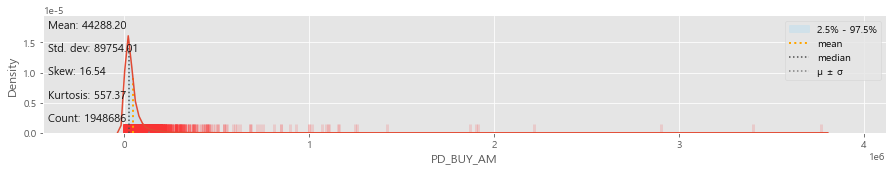

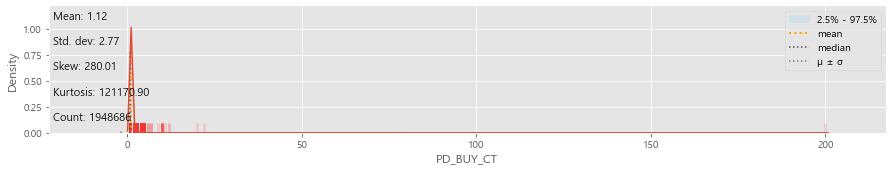

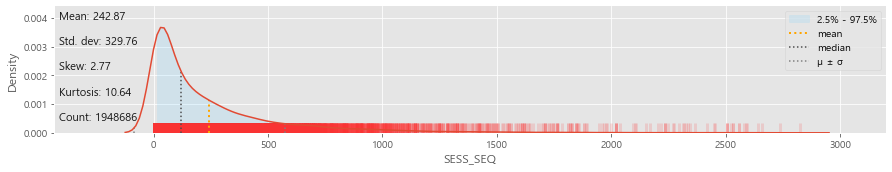

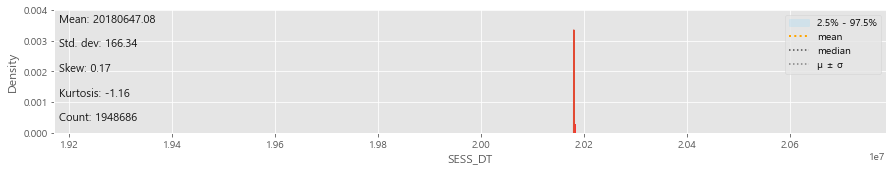

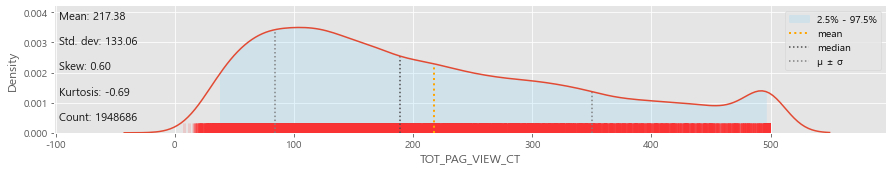

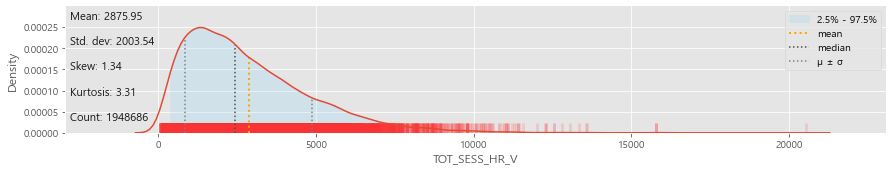

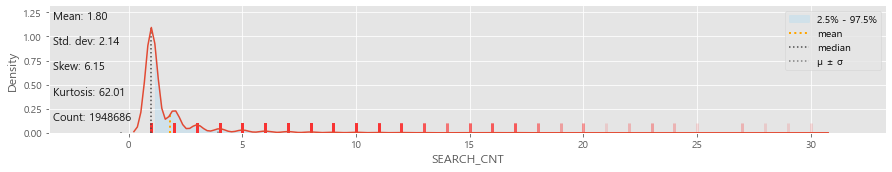

In [ ]:
# 수치형 속성 파악

klib.dist_plot(train)

### 수치형 변수 
skew한 분포를띄고 있는 PD_BUY_AM, PD_BUY_CT, SEARCH_CNT

TOP_PAG_VIEW_CT 컬럼은 꼬리에서 튀어오르는것을 보아 이상치가 존재 아웃라이어 존재 

# 데이터 전처리

# <font color='CC3D3D'>Feature Making

In [63]:
features = []
features_te = []

**[총구매액, 구매건수, 평균구매액, 최대구매액]**

# 수치형

In [64]:
#단일상품 구매금액 + 구매건수 
train['AMOUNT'] = train['PD_BUY_AM'] * train['PD_BUY_CT']
test['AMOUNT'] = test['PD_BUY_AM'] * test['PD_BUY_CT']

In [65]:
f = train.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최소구매액',np.min),
                                            ('최대구매액', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최소구매액',np.min),
                                            ('최대구매액', np.max)]).reset_index()
features_te.append(f_te) ; display(f_te)

,CLNT_ID,총구매액,구매건수,평균구매액,최소구매액,최대구매액
0,0,86500,2,43250,5500,81000
1,1,1276000,16,79750,39000,99000
2,6,148900,7,21271,8000,44900
3,9,42200,4,10550,8500,12600
4,12,510180,32,15943,990,79000
...,...,...,...,...,...,...
149995,263094,10000,1,10000,10000,10000
149996,263095,511000,5,102200,89000,155000
149997,263096,85500,3,28500,17000,47000
149998,263102,59400,15,3960,1080,9720


,CLNT_ID,총구매액,구매건수,평균구매액,최소구매액,최대구매액
0,2,560000,11,50909,20000,62100
1,3,851200,8,106400,102400,110400
2,4,125200,6,20867,12800,37000
3,5,380000,12,31667,11000,42000
4,7,457900,16,28619,20600,40000
...,...,...,...,...,...,...
113099,263097,753220,13,57940,25900,105000
113100,263098,601200,6,100200,100200,100200
113101,263099,973000,112,8688,7000,22000
113102,263100,22400,2,11200,9500,12900


In [66]:
f= train.groupby('CLNT_ID')['PD_BUY_CT'].agg([('총구매건수',np.sum),
                                           ('최소구매건수',np.min),
                                           ('최대구매건수',np.max),
                                           ('평균구매건수',np.mean)])
features.append(f);display(f)

f_te=test.groupby('CLNT_ID')['PD_BUY_CT'].agg([('총구매건수',np.sum),
                                           ('최소구매건수',np.min),
                                           ('최대구매건수',np.max),
                                           ('평균구매건수',np.mean)])
features_te.append(f_te) ; display(f_te)


,총구매건수,최소구매건수,최대구매건수,평균구매건수
CLNT_ID,,,,
0,2,1,1,1.000000
1,16,1,1,1.000000
6,7,1,1,1.000000
9,4,1,1,1.000000
12,32,1,1,1.000000
...,...,...,...,...
263094,1,1,1,1.000000
263095,5,1,1,1.000000
263096,3,1,1,1.000000


,총구매건수,최소구매건수,최대구매건수,평균구매건수
CLNT_ID,,,,
2,12,1,2,1.090909
3,8,1,1,1.000000
4,6,1,1,1.000000
5,12,1,1,1.000000
7,16,1,1,1.000000
...,...,...,...,...
263097,13,1,1,1.000000
263098,6,1,1,1.000000
263099,112,1,1,1.000000


**[주말방문비율]**

In [67]:
train['date'] = pd.to_datetime(train['SESS_DT'], format= '%Y%m%d')
test['date'] = pd.to_datetime(test['SESS_DT'], format= '%Y%m%d')

In [68]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features.append(f); display(f)

f_te = test.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,주말방문비율
0,0,1.000000
1,1,0.125000
2,6,0.857143
3,9,1.000000
4,12,0.250000
...,...,...
149995,263094,0.000000
149996,263095,0.000000
149997,263096,0.000000
149998,263102,0.000000


,CLNT_ID,주말방문비율
0,2,0.000000
1,3,1.000000
2,4,0.333333
3,5,0.000000
4,7,0.312500
...,...,...
113099,263097,0.307692
113100,263098,0.000000
113101,263099,0.000000
113102,263100,0.500000


**[계절방문비율]**

In [69]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean( x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,12])))
]).reset_index()
features.append(f); f

f_te = test.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean( x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,12])))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,2,0.000000,0.909091,0.090909,0.0
1,3,0.000000,0.000000,1.000000,0.0
2,4,0.666667,0.333333,0.000000,0.0
3,5,0.000000,0.000000,1.000000,0.0
4,7,0.437500,0.562500,0.000000,0.0
...,...,...,...,...,...
113099,263097,0.692308,0.307692,0.000000,0.0
113100,263098,0.000000,0.000000,1.000000,0.0
113101,263099,0.000000,1.000000,0.000000,0.0
113102,263100,0.500000,0.500000,0.000000,0.0


In [70]:
#주구매상품군
f= train.groupby('CLNT_ID')['CLAC1_NM'].agg([('주구매상품명', lambda x: x.mode()[0])]).reset_index()
features.append(f)

f_te= test.groupby('CLNT_ID')['CLAC1_NM'].agg([('주구매상품명', lambda x: x.mode()[0])]).reset_index()
features_te.append(f_te)

In [71]:
#구매상품군 다양성
n = train.CLAC1_NM.nunique()
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양성빙율', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f) ; f

n = test.CLAC1_NM.nunique()
f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('구매상품군다양성빙율', lambda x: len(x.unique()) / n)]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,구매상품군다양성빙율
0,2,0.054054
1,3,0.027027
2,4,0.054054
3,5,0.027027
4,7,0.081081
...,...,...
113099,263097,0.108108
113100,263098,0.027027
113101,263099,0.027027
113102,263100,0.054054


In [72]:
y=pd.read_csv('y_train.csv')

In [73]:
# 선호 브랜드
df = pd.merge(train, y, on='CLNT_ID')

In [74]:
F20=df[df.LABEL=='F20']
F30=df[df.LABEL=='F30']
F40=df[df.LABEL=='F40']
M20=df[df.LABEL=='M20']
M30=df[df.LABEL=='M30']
M40=df[df.LABEL=='M40']

In [75]:
F20_prefer_brd = F20.PD_BRA_NM.value_counts().index[1:11].tolist()
F30_prefer_brd = F30.PD_BRA_NM.value_counts().index[1:11].tolist()
F40_prefer_brd = F40.PD_BRA_NM.value_counts().index[1:11].tolist()
M20_prefer_brd = M20.PD_BRA_NM.value_counts().index[1:11].tolist()
M30_prefer_brd = M30.PD_BRA_NM.value_counts().index[1:11].tolist()
M40_prefer_brd = M40.PD_BRA_NM.value_counts().index[1:11].tolist()

In [76]:
def F20_brd(x):
    if x == F20_prefer_brd[0]:
        x=10
    elif x == F20_prefer_brd[1]:
        x=9
    elif x == F20_prefer_brd[2]:
        x=8
    elif x == F20_prefer_brd[3]:
        x=7
    elif x == F20_prefer_brd[4]:
        x=6
    elif x == F20_prefer_brd[5]:
        x=5
    elif x == F20_prefer_brd[6]:
        x=4
    elif x == F20_prefer_brd[7]:
        x=3
    elif x == F20_prefer_brd[8]:
        x=2
    elif x == F20_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [77]:
def F30_brd(x):
    if x == F30_prefer_brd[0]:
        x=10
    elif x == F30_prefer_brd[1]:
        x=9
    elif x == F30_prefer_brd[2]:
        x=8
    elif x == F30_prefer_brd[3]:
        x=7
    elif x == F30_prefer_brd[4]:
        x=6
    elif x == F30_prefer_brd[5]:
        x=5
    elif x == F30_prefer_brd[6]:
        x=4
    elif x == F30_prefer_brd[7]:
        x=3
    elif x == F30_prefer_brd[8]:
        x=2
    elif x == F30_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [78]:
def F40_brd(x):
    if x == F40_prefer_brd[0]:
        x=10
    elif x == F40_prefer_brd[1]:
        x=9
    elif x == F40_prefer_brd[2]:
        x=8
    elif x == F40_prefer_brd[3]:
        x=7
    elif x == F40_prefer_brd[4]:
        x=6
    elif x == F40_prefer_brd[5]:
        x=5
    elif x == F40_prefer_brd[6]:
        x=4
    elif x == F40_prefer_brd[7]:
        x=3
    elif x == F40_prefer_brd[8]:
        x=2
    elif x == F40_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [79]:
def M20_brd(x):
    if x == M20_prefer_brd[0]:
        x=10
    elif x == M20_prefer_brd[1]:
        x=9
    elif x == M20_prefer_brd[2]:
        x=8
    elif x == M20_prefer_brd[3]:
        x=7
    elif x == M20_prefer_brd[4]:
        x=6
    elif x == M20_prefer_brd[5]:
        x=5
    elif x == M20_prefer_brd[6]:
        x=4
    elif x == M20_prefer_brd[7]:
        x=3
    elif x == M20_prefer_brd[8]:
        x=2
    elif x == M20_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [80]:
def M30_brd(x):
    if x == M30_prefer_brd[0]:
        x=10
    elif x == M30_prefer_brd[1]:
        x=9
    elif x == M30_prefer_brd[2]:
        x=8
    elif x == M30_prefer_brd[3]:
        x=7
    elif x == M30_prefer_brd[4]:
        x=6
    elif x == M30_prefer_brd[5]:
        x=5
    elif x == M30_prefer_brd[6]:
        x=4
    elif x == M30_prefer_brd[7]:
        x=3
    elif x == M30_prefer_brd[8]:
        x=2
    elif x == M30_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [81]:
def M40_brd(x):
    if x == M40_prefer_brd[0]:
        x=10
    elif x == M40_prefer_brd[1]:
        x=9
    elif x == M40_prefer_brd[2]:
        x=8
    elif x == M40_prefer_brd[3]:
        x=7
    elif x == M40_prefer_brd[4]:
        x=6
    elif x == M40_prefer_brd[5]:
        x=5
    elif x == M40_prefer_brd[6]:
        x=4
    elif x == M40_prefer_brd[7]:
        x=3
    elif x == M40_prefer_brd[8]:
        x=2
    elif x == M40_prefer_brd[9]:
        x=1
    else:
        x=0
    return x

In [82]:
train['F20_point'] = train['PD_BRA_NM'].apply(F20_brd)
train['F30_point'] = train['PD_BRA_NM'].apply(F30_brd)
train['F40_point'] = train['PD_BRA_NM'].apply(F40_brd)
train['M20_point'] = train['PD_BRA_NM'].apply(M20_brd)
train['M30_point'] = train['PD_BRA_NM'].apply(M30_brd)
train['M40_point'] = train['PD_BRA_NM'].apply(M40_brd)

test['F20_point'] = test['PD_BRA_NM'].apply(F20_brd)
test['F30_point'] = test['PD_BRA_NM'].apply(F30_brd)
test['F40_point'] = test['PD_BRA_NM'].apply(F40_brd)
test['M20_point'] = test['PD_BRA_NM'].apply(M20_brd)
test['M30_point'] = test['PD_BRA_NM'].apply(M30_brd)
test['M40_point'] = test['PD_BRA_NM'].apply(M40_brd)

In [83]:
F20_brd_point=train.groupby('CLNT_ID')['F20_point'].mean().reset_index()
F30_brd_point=train.groupby('CLNT_ID')['F30_point'].mean().reset_index()
F40_brd_point=train.groupby('CLNT_ID')['F40_point'].mean().reset_index()
M20_brd_point=train.groupby('CLNT_ID')['M20_point'].mean().reset_index()
M30_brd_point=train.groupby('CLNT_ID')['M30_point'].mean().reset_index()
M40_brd_point=train.groupby('CLNT_ID')['M40_point'].mean().reset_index()

te_F20_brd_point=test.groupby('CLNT_ID')['F20_point'].mean().reset_index()
te_F30_brd_point=test.groupby('CLNT_ID')['F30_point'].mean().reset_index()
te_F40_brd_point=test.groupby('CLNT_ID')['F40_point'].mean().reset_index()
te_M20_brd_point=test.groupby('CLNT_ID')['M20_point'].mean().reset_index()
te_M30_brd_point=test.groupby('CLNT_ID')['M30_point'].mean().reset_index()
te_M40_brd_point=test.groupby('CLNT_ID')['M40_point'].mean().reset_index()

In [84]:
features.append(F20_brd_point)
features.append(F30_brd_point)
features.append(F40_brd_point)
features.append(M20_brd_point)
features.append(M30_brd_point)
features.append(M40_brd_point)

features_te.append(te_F20_brd_point)
features_te.append(te_F30_brd_point)
features_te.append(te_F40_brd_point)
features_te.append(te_M20_brd_point)
features_te.append(te_M30_brd_point)
features_te.append(te_M40_brd_point)


In [85]:
#브랜드 다양성
n = train.PD_BRA_NM.nunique()
f = train.groupby('CLNT_ID')['PD_BRA_NM'].agg([('브랜드다양성', lambda x: len(x.unique()) / n)]).reset_index()
features.append(f) ; f

n = test.PD_BRA_NM.nunique()
f_te = test.groupby('CLNT_ID')['PD_BRA_NM'].agg([('브랜드다양성', lambda x: len(x.unique()) / n)]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,브랜드다양성
0,2,0.000347
1,3,0.000231
2,4,0.000231
3,5,0.000231
4,7,0.000810
...,...,...
113099,263097,0.000463
113100,263098,0.000116
113101,263099,0.000116
113102,263100,0.000231


In [86]:
#히트 세션 평균
f=train.groupby('CLNT_ID')['HITS_SEQ'].agg([('히트세션평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['HITS_SEQ'].agg([('히트세션평균',np.mean)])
features_te.append(f_te) ; f_te

,히트세션평균
CLNT_ID,
2,234.181818
3,39.500000
4,23.666667
5,53.000000
7,139.562500
...,...
263097,346.230769
263098,152.000000
263099,275.000000


In [87]:
#세션시간 평균
f=train.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총세션시간평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([('총세션시간평균',np.mean)])
features_te.append(f_te) ; f_te

,총세션시간평균
CLNT_ID,
2,4385.545455
3,1051.000000
4,699.666667
5,3214.000000
7,4468.937500
...,...
263097,3313.769231
263098,1175.000000
263099,3890.000000


In [88]:
#홈페이지조회시간
f = train.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].agg([('페이지접속건수', np.size),
                                            ('평균페이지조회건수', lambda x : np.round(np.mean(x))),
                                            ('최대페이지조회건수', np.max)]).reset_index()
features.append(f)

f_te = test.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].agg([('페이지접속건수', np.size),
                                            ('평균페이지조회건수', lambda x : np.round(np.mean(x))),
                                            ('최대페이지조회건수', np.max)]).reset_index()
features_te.append(f_te)

In [89]:
#구매세션 평균
f=train.groupby('CLNT_ID')['SESS_SEQ'].agg([('구매세션평균',np.mean)])
features.append(f) ; f

f_te=test.groupby('CLNT_ID')['SESS_SEQ'].agg([('구매세션평균',np.mean)])
features_te.append(f_te) ; f_te

,구매세션평균
CLNT_ID,
2,37.272727
3,1.000000
4,73.666667
5,11.000000
7,99.562500
...,...
263097,362.230769
263098,342.000000
263099,5.000000


In [90]:
#구매세션
f = train.groupby('CLNT_ID')['SEARCH_CNT'].agg([('평균검색건수', lambda x : np.mean(x)),
                                            ('최대검색건수', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['SEARCH_CNT'].agg([('평균검색건수', lambda x : np.mean(x)),
                                            ('최대검색건수', np.max)]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,평균검색건수,최대검색건수
0,0,1.000000,1
1,1,1.437500,2
2,6,1.142857,2
3,9,10.500000,13
4,12,1.656250,4
...,...,...,...
149995,263094,1.000000,1
149996,263095,2.200000,3
149997,263096,1.000000,1
149998,263102,1.200000,2


,CLNT_ID,평균검색건수,최대검색건수
0,2,2.090909,3
1,3,1.500000,3
2,4,1.833333,2
3,5,1.250000,2
4,7,1.000000,1
...,...,...,...
113099,263097,3.384615,9
113100,263098,1.166667,2
113101,263099,1.142857,2
113102,263100,1.000000,1


## 현지씨 피쳐

In [91]:
#
f = train.groupby('CLNT_ID')['PD_BUY_AM'].agg([('상품금액평균', lambda x : np.mean(x)),
                                               ('최저가 구매 상품', np.min),
                                               ('최고가 구매 상품', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['PD_BUY_AM'].agg([('상품금액평균', lambda x : np.mean(x)),
                                                 ('최저가 구매 상품', np.min),
                                                 ('최고가 구매 상품', np.max)]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,상품금액평균,최저가 구매 상품,최고가 구매 상품
0,0,43250.000000,5500,81000
1,1,79750.000000,39000,99000
2,6,21271.428571,8000,44900
3,9,10550.000000,8500,12600
4,12,15943.125000,990,79000
...,...,...,...,...
149995,263094,10000.000000,10000,10000
149996,263095,102200.000000,89000,155000
149997,263096,28500.000000,17000,47000
149998,263102,1080.000000,1080,1080


,CLNT_ID,상품금액평균,최저가 구매 상품,최고가 구매 상품
0,2,50000.000000,10000,62100
1,3,106400.000000,102400,110400
2,4,20866.666667,12800,37000
3,5,31666.666667,11000,42000
4,7,28618.750000,20600,40000
...,...,...,...,...
113099,263097,57940.000000,25900,105000
113100,263098,100200.000000,100200,100200
113101,263099,8687.500000,7000,22000
113102,263100,11200.000000,9500,12900


In [92]:
#
f = train.groupby('CLNT_ID')['date'].agg([
    ('상반기-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,3,4,5,6]))),
    ('하반기-구매비율', lambda x: np.mean( x.dt.month.isin([7,8,9,10,11,12])))
]).reset_index()
features.append(f); f

,CLNT_ID,상반기-구매비율,하반기-구매비율
0,0,1.0,0.0
1,1,1.0,0.0
2,6,1.0,0.0
3,9,1.0,0.0
4,12,0.0,1.0
...,...,...,...
149995,263094,1.0,0.0
149996,263095,0.8,0.2
149997,263096,0.0,1.0
149998,263102,1.0,0.0


In [93]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('상반기-구매비율', lambda x: np.mean( x.dt.month.isin([1,2,3,4,5,6]))),
    ('하반기-구매비율', lambda x: np.mean( x.dt.month.isin([7,8,9,10,11,12])))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,상반기-구매비율,하반기-구매비율
0,2,0.909091,0.090909
1,3,0.000000,1.000000
2,4,0.666667,0.333333
3,5,0.000000,1.000000
4,7,0.500000,0.500000
...,...,...,...
113099,263097,1.000000,0.000000
113100,263098,0.000000,1.000000
113101,263099,0.000000,1.000000
113102,263100,1.000000,0.000000


In [94]:
#
f = train.groupby('CLNT_ID')['date'].agg([
    ('월초-구매비율', lambda x: np.mean( x.dt.day<16)),
    ('월말-구매비율', lambda x: np.mean( x.dt.day>15))
]).reset_index()
features.append(f); f

,CLNT_ID,월초-구매비율,월말-구매비율
0,0,1.000000,0.000000
1,1,0.125000,0.875000
2,6,0.142857,0.857143
3,9,0.000000,1.000000
4,12,0.843750,0.156250
...,...,...,...
149995,263094,0.000000,1.000000
149996,263095,0.800000,0.200000
149997,263096,1.000000,0.000000
149998,263102,1.000000,0.000000


In [95]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('월초-구매비율', lambda x: np.mean( x.dt.day<16)),
    ('월말-구매비율', lambda x: np.mean( x.dt.day>15))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,월초-구매비율,월말-구매비율
0,2,1.000000,0.000000
1,3,1.000000,0.000000
2,4,1.000000,0.000000
3,5,1.000000,0.000000
4,7,0.937500,0.062500
...,...,...,...
113099,263097,0.692308,0.307692
113100,263098,1.000000,0.000000
113101,263099,1.000000,0.000000
113102,263100,0.000000,1.000000


# 수민씨 피쳐

In [96]:
f = train.groupby('CLNT_ID')['KWD_NM'].agg([
    ('검색 키워드 개수' , lambda x : x.nunique())]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['KWD_NM'].agg([
    ('검색 키워드 개수' , lambda x : x.nunique())]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,검색 키워드 개수
0,0,1
1,1,9
2,6,2
3,9,2
4,12,12
...,...,...
149995,263094,1
149996,263095,5
149997,263096,1
149998,263102,5


,CLNT_ID,검색 키워드 개수
0,2,6
1,3,4
2,4,4
3,5,4
4,7,10
...,...,...
113099,263097,7
113100,263098,6
113101,263099,7
113102,263100,2


In [97]:
f = train.groupby('CLNT_ID')['DVC_CTG_NM'].agg([
    ('mobile', lambda x: np.mean(x == 'mobile')),
    ('tablet', lambda x: np.mean(x =='tablet')),
    ('desktop', lambda x: np.mean(x == 'desktop'))]).reset_index()
features.append(f); f

f_te = test.groupby('CLNT_ID')['DVC_CTG_NM'].agg([
    ('mobile', lambda x: np.mean(x == 'mobile')),
    ('tablet', lambda x: np.mean(x =='tablet')),
    ('desktop', lambda x: np.mean(x == 'desktop'))]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,mobile,tablet,desktop
0,2,1.0,0.0,0.0
1,3,1.0,0.0,0.0
2,4,1.0,0.0,0.0
3,5,1.0,0.0,0.0
4,7,1.0,0.0,0.0
...,...,...,...,...
113099,263097,1.0,0.0,0.0
113100,263098,1.0,0.0,0.0
113101,263099,1.0,0.0,0.0
113102,263100,1.0,0.0,0.0


In [98]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('구매일 수', lambda x: x.nunique()),
    ('구매 주기', lambda x: int(((x.max() - x.min()).days) / x.nunique()))]).reset_index()
features.append(f); f
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('구매일 수', lambda x: x.nunique()),
    ('구매 주기', lambda x: int(((x.max() - x.min()).days) / x.nunique()))]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,구매일 수,구매 주기
0,2,2,40
1,3,1,0
2,4,2,51
3,5,1,0
4,7,5,16
...,...,...,...
113099,263097,2,25
113100,263098,1,0
113101,263099,1,0
113102,263100,2,12


# <font color='CC3D3D'> Feature Merge

In [62]:
#data.to_csv('data.csv')
#data_te.to_csv('data_te.csv')

- PD_C - 상품의 종류, 상품종류 / 상품브랜드 종류, 상품종류 / 구매횟수

- ZON_NM + CITY_NM = 지역주소를 이용하여 어느 고객인지 유추? 피쳐가 너무 많아질 가능성

상품의 종류에 대한 피처

In [99]:
f = train.groupby('CLNT_ID')['PD_C'].agg([
    ('상품의종류', lambda x: x.nunique())]).reset_index()
features.append(f); f
f_te = test.groupby('CLNT_ID')['PD_C'].agg([
    ('상품의종류', lambda x: x.nunique())]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,상품의종류
0,2,3
1,3,2
2,4,2
3,5,2
4,7,7
...,...,...
113099,263097,4
113100,263098,1
113101,263099,4
113102,263100,2


주거지에 대한 피처

In [100]:
train['지역']=train.ZON_NM+train.CITY_NM
test['지역']=test.ZON_NM+test.CITY_NM

In [101]:
# 이사 횟수
f=train.groupby('CLNT_ID')['지역'].nunique().reset_index()
features.append(f)
f_te=test.groupby('CLNT_ID')['지역'].nunique().reset_index()
features_te.append(f_te)

In [102]:
# 주 주거지 ----- word2vec 사용하고 싶은데 이건 나중에 학회시간에 배우면 사용해보자
f=train.groupby('CLNT_ID')['지역'].agg([('주거지', lambda x: x.mode()[0])]).reset_index()
features.append(f)
f_te=test.groupby('CLNT_ID')['지역'].agg([('주거지', lambda x: x.mode()[0])]).reset_index()
features_te.append(f_te)

In [103]:
for f in features :
    data = pd.merge(data, f, how='left',on='CLNT_ID')
    
data = data.fillna(0)

In [104]:
#범주형변수 원핫인코딩 (나중에 PCA진행)
data = pd.get_dummies(data, '주거지')

In [105]:
for f_te in features_te :
    data_te = pd.merge(data_te, f_te, how='left',on='CLNT_ID')
    
data_te = data_te.fillna(0)

In [ ]:
# 이상치(outlier)를 제거한다.
train_test1.iloc[:,1:] = train_test1.iloc[:,1:].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 왼쪽으로 치우진 분포를 정규분포로 바꾸기 위해 로그 변환을 수행한다.
train_test1.iloc[:,1:] = np.log1p(train_test1.iloc[:,1:])

# 특성 차원이 너무 많을 경우 과적합이 발생하기 때문에 차원 축소를 실행한다.
max_d = num_d = train_test1.shape[1] - 1
pca = PCA(n_components=1600, random_state=0).fit(train_test1.iloc[:,1:])
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             # 분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0).fit_transform(train_test1.iloc[:,1:])
train_test1 = pd.concat([train_test1.iloc[:,0], pd.DataFrame(pca)], axis=1)

In [106]:
#범주형변수 원핫인코딩 (나중에 PCA진행)
data_te = pd.get_dummies(data_te, '주거지')

In [107]:

#범주형변수 원핫인코딩 (나중에 PCA진행)
data = pd.get_dummies(data, '주구매상품명')

#범주형변수 원핫인코딩 (나중에 PCA진행)
data_te = pd.get_dummies(data_te, '주구매상품명')

고객의 성향을 알수 있는 피처?

In [126]:
# 상품 종류가 많은데 브랜드 다양성이 적다? -> 그 브랜드를 좋아하고 브랜드의 다양한 상품을 경험한 것
# 상품 종류가 적은데 브랜드 다양성이 비교적으로 많다면? -> 한 상품에 대해서 어떤 브랜드가 좋은지 비교하는 성향인 고객

data['상품종류_브랜드']=data.상품의종류 * data.브랜드다양성
data_te['상품종류_브랜드']=data_te.상품의종류 * data_te.브랜드다양성

In [109]:
# 상품의 종류가 많은데 구매건수가 적다면? -> 종류별로 하나씩만 구매하는걸 좋아하는 고객
# 상품의 종류가 적은데 구매건수가 많다면? -> 그 종류의 상품만 구매를 하는 고객
data['상품종류_구매건수']=data.상품의종류 /data.구매건수
data_te['상품종류_구매건수']=data_te.상품의종류 /data_te.구매건수

In [128]:
a_sub_b = [x for x in data.columns if x not in data_te.columns]
data.drop(a_sub_b, axis=1, inplace=True)

b_sub_a = [x for x in data_te.columns if x not in data.columns]
data_te.drop(b_sub_a,axis=1,inplace=True)

In [129]:
data.shape, data_te.shape

((150000, 448), (113104, 448))

## 여기서 부터 시작

In [133]:
features=[]
features_te=[]

In [134]:
## 이 상품 구매의 90%이상이 여자일 품목 
listo = []
for i in range(len(train['CLAC1_NM'].unique())):
    listo.append(train['CLAC1_NM'].unique()[i])

listo2 = []
for i in range(len(listo)):
    if '화장품/뷰티케어' in listo[i]:
        listo2.append(listo[i])
    elif '유아동의류' in listo[i]:
        listo2.append(listo[i])
    elif '출산/육아용품' in listo[i]:
        listo2.append(listo[i])
    elif '퍼스널케어' in listo[i]:
        listo2.append(listo[i])
    elif '원예/애완' in listo[i]:
        listo2.append(listo[i])
    elif '여성의류' in listo[i]:
        listo2.append(listo[i])
print('여성 선호 품목 : {}'.format(listo2))

## 이 상품 구매의 90%이상이 남자일 품목 
listo3 = []
for j in range(len(listo)):
    if '남성의류' in listo[j]:
        listo3.append(listo[j])
print('남성 선호 품목 : {}'.format(listo3))

여성 선호 품목 : ['화장품/뷰티케어', '유아동의류', '출산/육아용품', '퍼스널케어', '원예/애완', '여성의류']
남성 선호 품목 : ['남성의류']


In [135]:
#여성선호품목 구매건수
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('여성선호품목구매건수', lambda x: list(x).count('화장품/뷰티케어')+list(x).count('유아동의류')+list(x).count('출산/육아용품')+list(x).count('퍼스널케어')+list(x).count('원예/애완')+list(x).count('여성의류'))]).reset_index()
features.append(f) ; f

f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('여성선호품목구매건수', lambda x: list(x).count('화장품/뷰티케어')+list(x).count('유아동의류')+list(x).count('출산/육아용품')+list(x).count('퍼스널케어')+list(x).count('원예/애완')+list(x).count('여성의류'))]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,여성선호품목구매건수
0,2,1
1,3,0
2,4,2
3,5,12
4,7,13
...,...,...
113099,263097,3
113100,263098,0
113101,263099,0
113102,263100,1


In [136]:
#남성선호품목 구매건수
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('남성선호품목구매건수', lambda x: list(x).count('남성의류'))]).reset_index()
features.append(f) ; f

f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('남성선호품목구매건수', lambda x: list(x).count('남성의류'))]).reset_index()
features_te.append(f_te) ; f_te

,CLNT_ID,남성선호품목구매건수
0,2,0
1,3,0
2,4,4
3,5,0
4,7,2
...,...,...
113099,263097,0
113100,263098,6
113101,263099,112
113102,263100,1


In [137]:
for f in features :
    data = pd.merge(data, f, how='left',on='CLNT_ID')
    
data = data.fillna(0)

In [138]:
for f_te in features_te :
    data_te = pd.merge(data_te, f_te, how='left',on='CLNT_ID')
    
data_te = data_te.fillna(0)

In [139]:
data['여성선호품목구매비율']=data['여성선호품목구매건수']/data['총구매건수']
data_te['여성선호품목구매비율']=data['여성선호품목구매건수']/data['총구매건수']

data['남성선호품목구매비율']=data['남성선호품목구매건수']/data['총구매건수']
data_te['남성선호품목구매비율']=data['남성선호품목구매건수']/data['총구매건수']

## 여기서 부터 시작

In [141]:
data.to_csv('data.csv')
data_te.to_csv('data_te.csv')

In [229]:
data=pd.read_csv('data.csv')
data_te=pd.read_csv('data_te.csv')

In [238]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data_te.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
data.shape, data_te.shape

((150000, 252), (113104, 252))

In [ ]:
# 수치형 속성 파악 
# 그렇게 큰 이상치는 없는것으로 파악, skew한 분포는 후에 로그 치환 ,box-cox변환으로 처리 지금은 귀찮
klib.dist_plot(data)

# <font color='CC3D3D'> Modeling

### 로그치환

In [151]:
from scipy.stats import skew, kurtosis


In [154]:
skew_df = pd.DataFrame({'컬럼명': data.columns, 'skew': skew(data)})

In [173]:
skew_df[(skew_df['skew']>2) | (skew_df['skew']<-2)]

,컬럼명,skew
1,주구매상품명_가구,10.362645
2,주구매상품명_건강식품,5.160663
3,주구매상품명_계절가전,16.912150
4,주구매상품명_과일,13.347845
5,주구매상품명_구기/필드스포츠,11.668496
...,...,...
445,주거지_UlsanUlsan,7.134299
446,상품종류_브랜드,27.633711
448,여성선호품목구매건수,27.998503
449,남성선호품목구매건수,11.785012


In [180]:
new_skew_df=skew_df[skew_df.컬럼명.str.contains('주구매|주거지') == False]

In [184]:
#주로 금액, 건수 등이 skew한 분포를 보임 로그치환 진행
new_skew_df[(new_skew_df['skew']>2) | (new_skew_df['skew']<-2)]

,컬럼명,skew
201,총구매액,171.392990
202,구매건수,33.285198
203,평균구매액,14.478011
204,최소구매액,15.483027
205,최대구매액,10.381434
206,총구매건수,35.026162
207,최소구매건수,127.620405
208,최대구매건수,134.618179
209,평균구매건수,137.203383
215,구매상품군다양성빙율,3.150490


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (51), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='M30_point', ylabel='Density'>

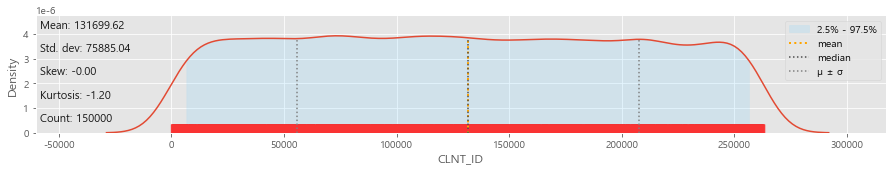

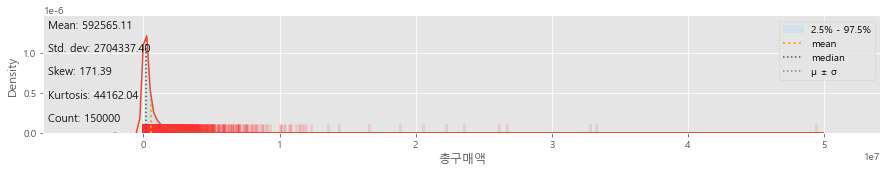

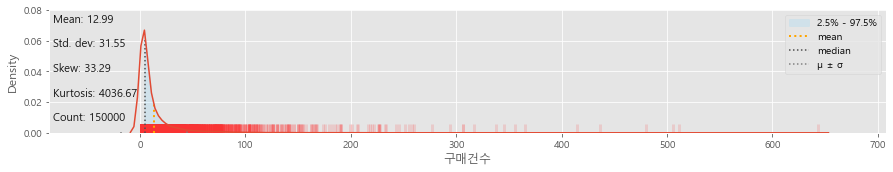

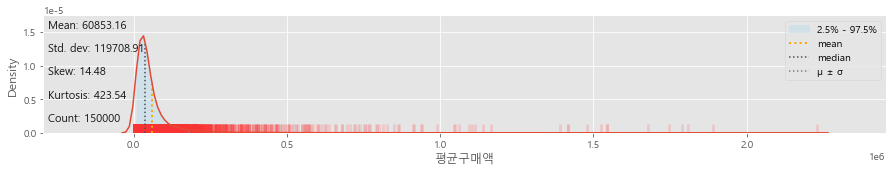

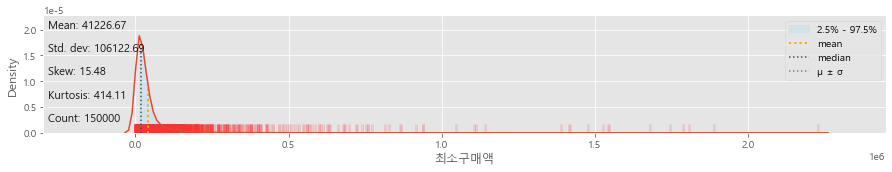

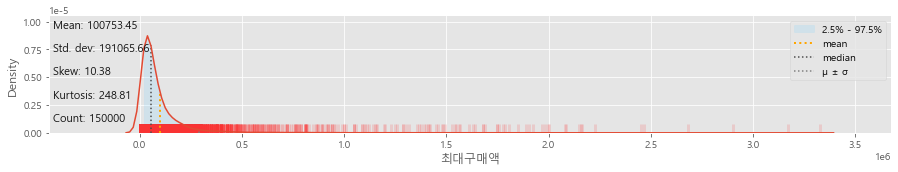

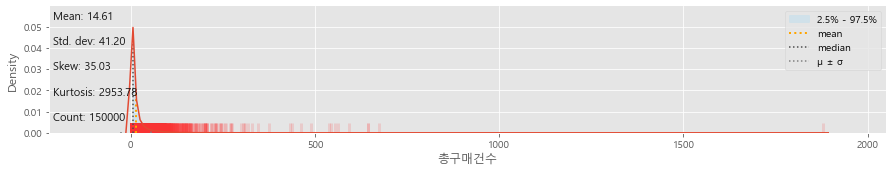

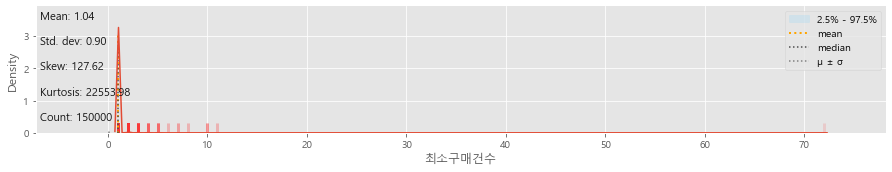

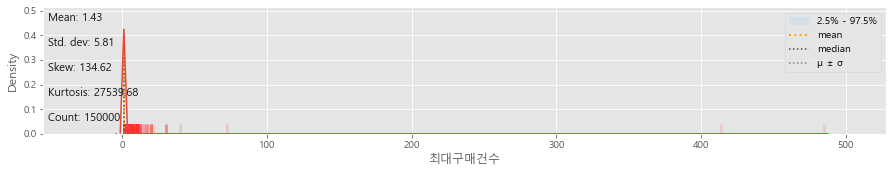

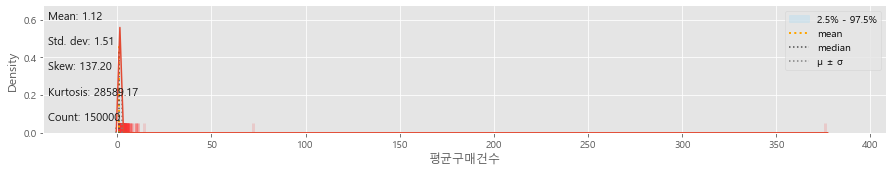

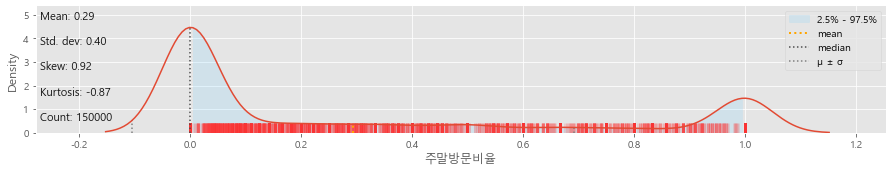

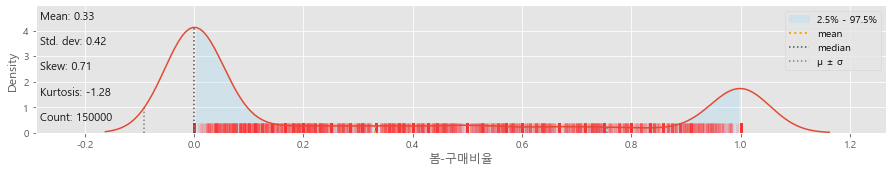

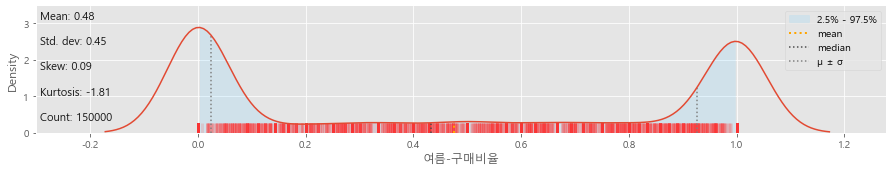

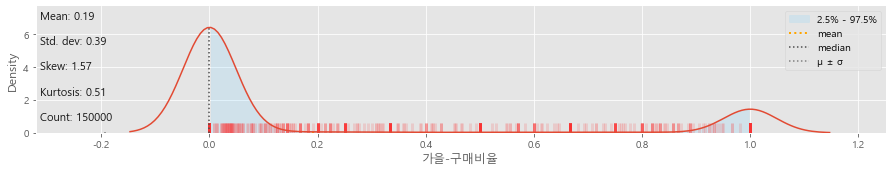

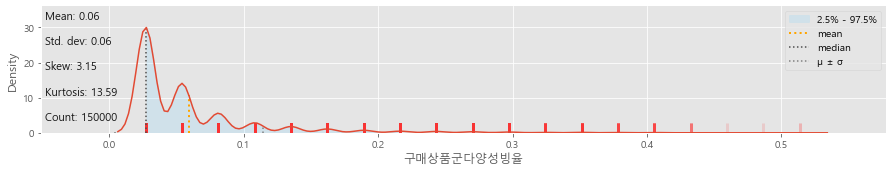

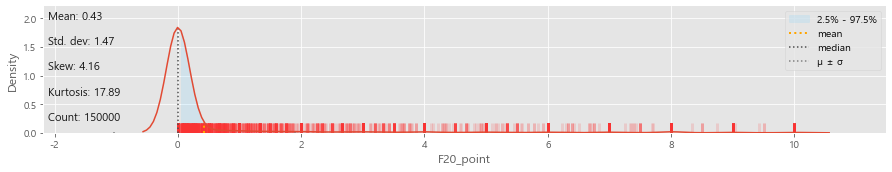

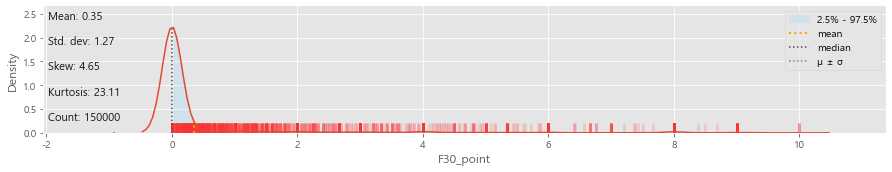

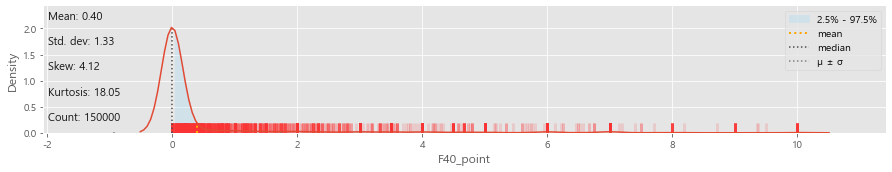

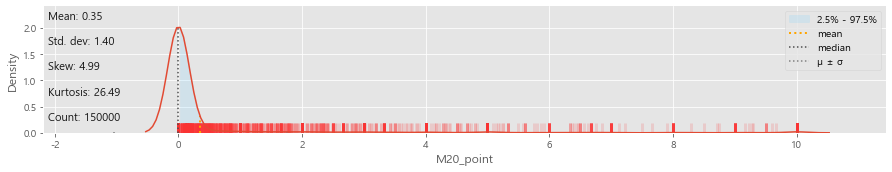

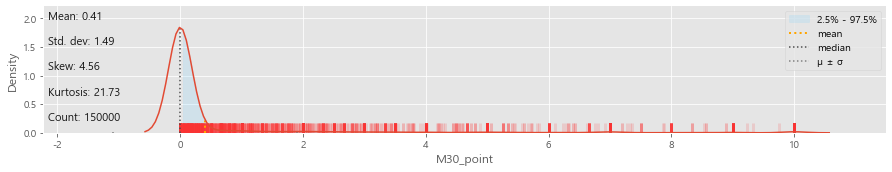

In [149]:
klib.dist_plot(data)

In [197]:
T_skew_df=new_skew_df.set_index('컬럼명').T

In [213]:
T_skew_df.총구매액 > 2

skew    True
Name: 총구매액, dtype: bool

In [214]:
log_list=[]
for i in list(T_skew_df.columns):
    if (T_skew_df[i]> 2).bool():
        log_list.append(i)

In [230]:
data[log_list]=np.log1p(data[log_list])

data_te[log_list]=np.log1p(data_te[log_list])

In [227]:
skew_df = pd.DataFrame({'컬럼명': data.columns, 'skew': skew(data)})
new_skew_df=skew_df[skew_df.컬럼명.str.contains('주구매|주거지') == False]

In [228]:
new_skew_df

,컬럼명,skew
0,CLNT_ID,-0.001669
201,총구매액,-0.266204
202,구매건수,0.245295
203,평균구매액,-0.300556
204,최소구매액,-0.511385
205,최대구매액,-0.359124
206,총구매건수,0.223512
207,최소구매건수,10.295968
208,최대구매건수,3.168099
209,평균구매건수,5.675989


## 이상치처리

In [239]:
data.columns

Index(['CLNT_ID', '주구매상품명_가구', '주구매상품명_건강식품', '주구매상품명_계절가전', '주구매상품명_과일',
       '주구매상품명_구기/필드스포츠', '주구매상품명_남성의류', '주구매상품명_냉동식품', '주구매상품명_냉장/세탁가전',
       '주구매상품명_냉장식품',
       ...
       '주거지_Jeollanam-doYeonggwang-gun', '주거지_Jeollanam-doYeosu-si',
       '주거지_SeoulSeoul', '주거지_UlsanUlsan', '상품종류_브랜드', '상품종류_구매건수',
       '여성선호품목구매건수', '남성선호품목구매건수', '여성선호품목구매비율', '남성선호품목구매비율'],
      dtype='object', length=452)

In [247]:
column=pd.DataFrame(data.columns)
column.columns=['컬럼명']

In [252]:
select_list=list(column[column.컬럼명.str.contains('주구매|주거지') == False].컬럼명)

In [256]:
select_list=select_list[1:]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (50), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='M40_point', ylabel='Density'>

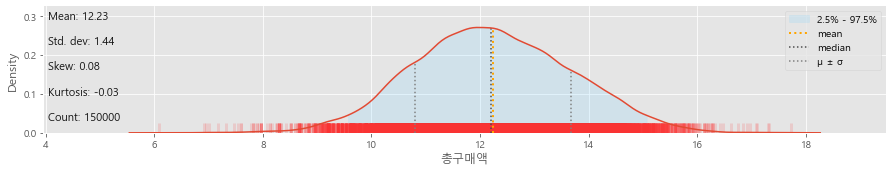

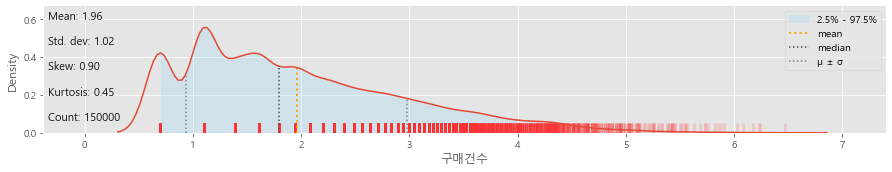

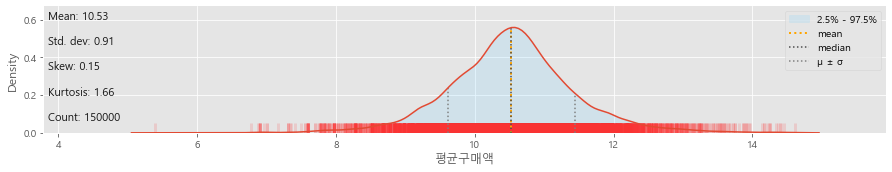

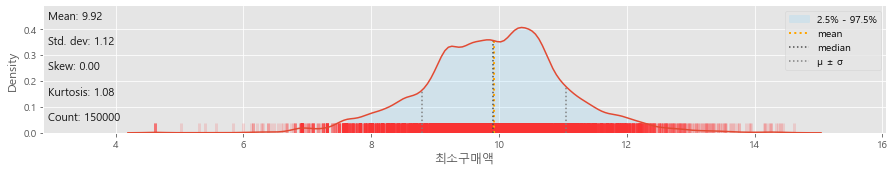

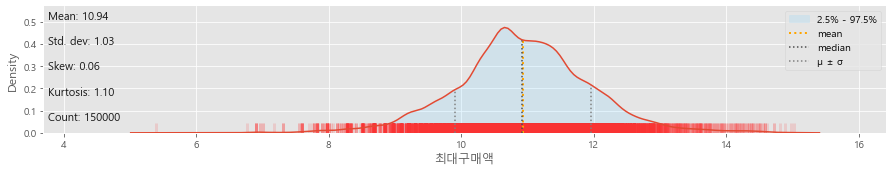

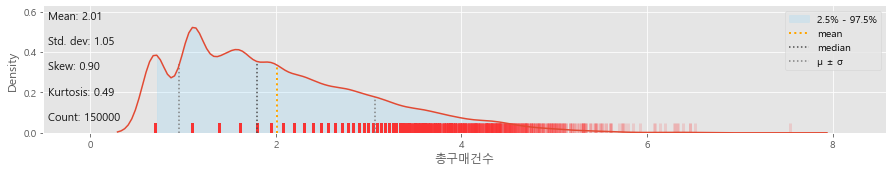

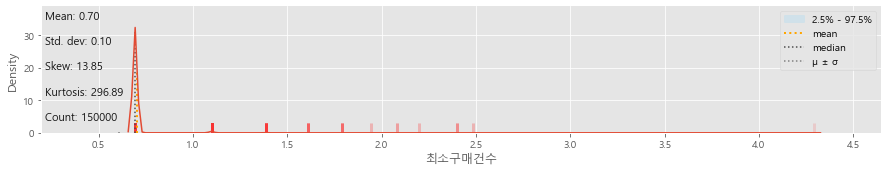

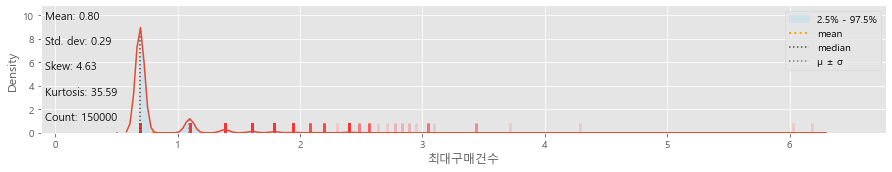

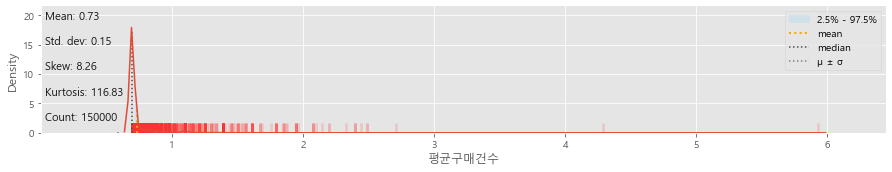

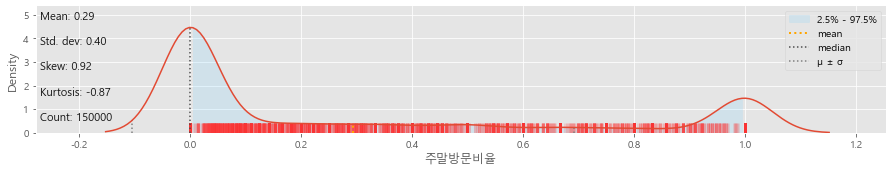

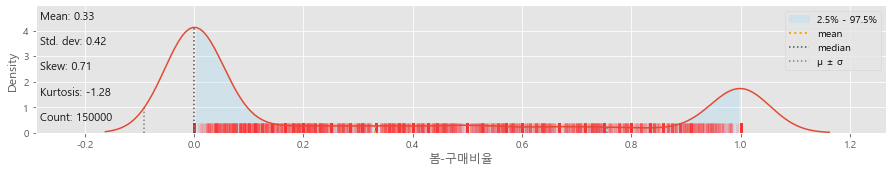

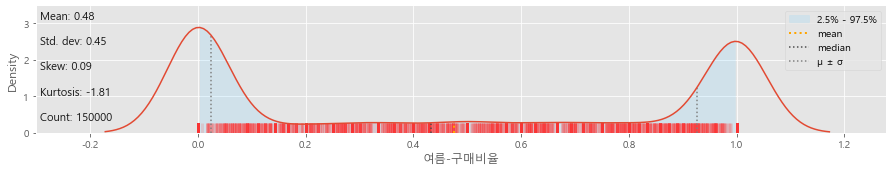

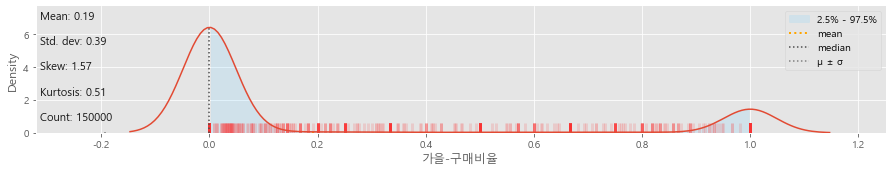

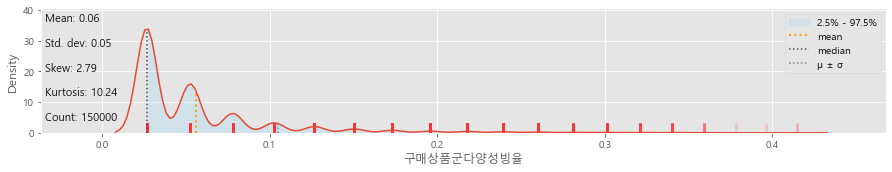

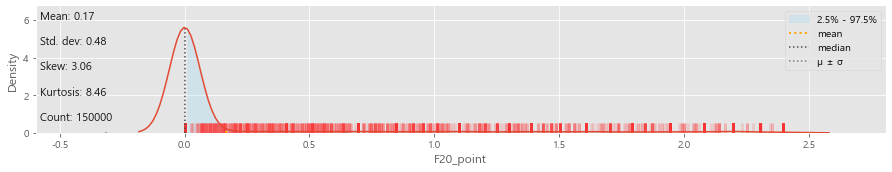

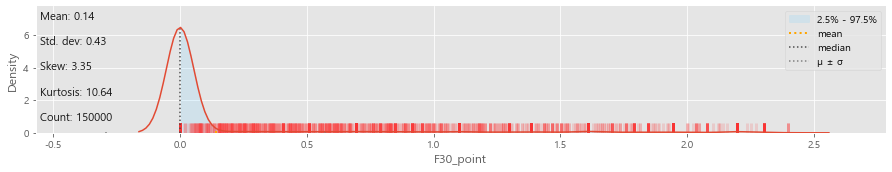

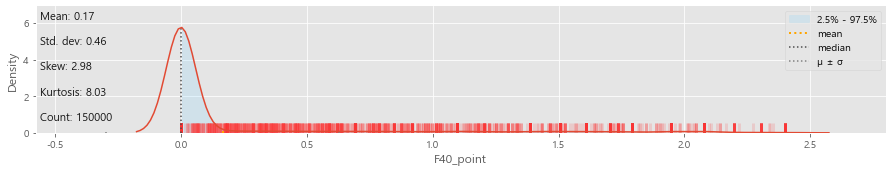

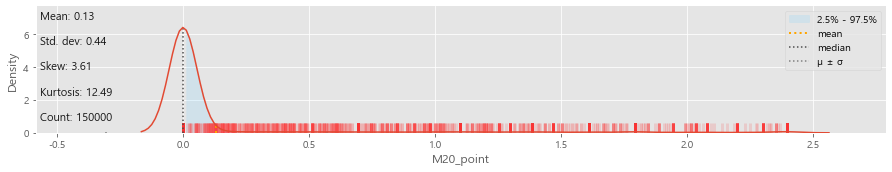

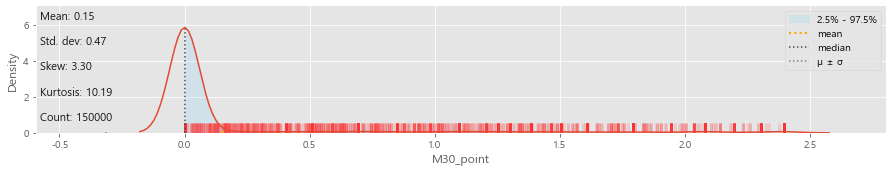

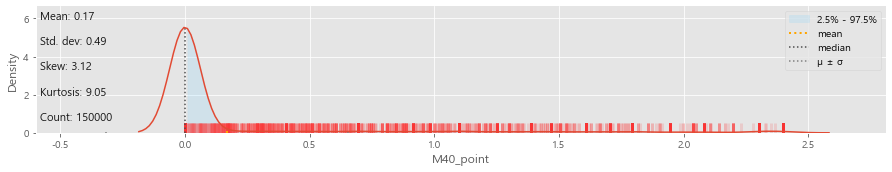

In [262]:
klib.dist_plot(data[select_list])

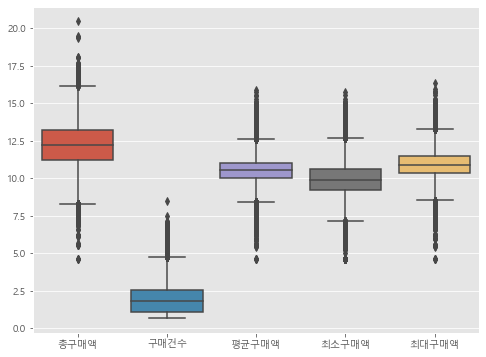

In [261]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data.loc[:,('총구매액', '구매건수', '평균구매액', '최소구매액', '최대구매액')])
plt.show()

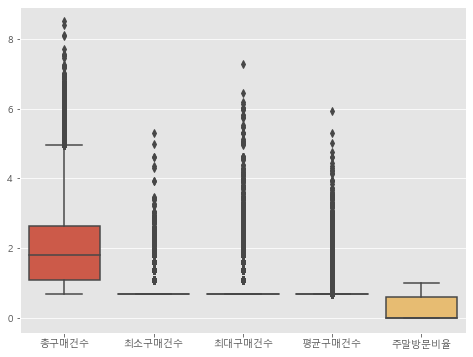

In [264]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data.loc[:,('총구매건수', '최소구매건수', '최대구매건수', '평균구매건수', '주말방문비율')])
plt.show()

In [ ]:
#data_num_features = data.select_dtypes(exclude='object').columns.to_list()
#data_te_num_features = data_te.select_dtypes(exclude='object').columns.to_list()

In [ ]:
#data[data_num_features] = data[data_num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)
#data_te[data_te_num_features] = data_te[data_te_num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [143]:
cust_tr = data.CLNT_ID
cust_te = data_te.CLNT_ID 

## 임발란스 데이터

In [186]:
df.LABEL.value_counts()

F30    797370
F40    777364
F20    150715
M40    124905
M30     78914
M20     19418
Name: LABEL, dtype: int64

<AxesSubplot:xlabel='LABEL', ylabel='count'>

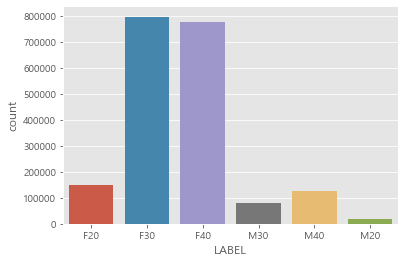

In [185]:
sns.countplot(x='LABEL',data=df)

In [300]:
X = data.drop(columns=['CLNT_ID'])
X_test = data_te.drop(columns=['CLNT_ID'])

y =  pd.read_csv('y_train.csv').LABEL

In [301]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#테스트 스케일링은 data leakge 방지를 위해 transform만
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [302]:
X_columns=X.columns

In [303]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_columns)

# 2주차 과제 예시 활용 GridSearch, RandomSearch

100%|██████████| 95/95 [54:35<00:00, 34.48s/it]

(53, -1.2641688986016655)


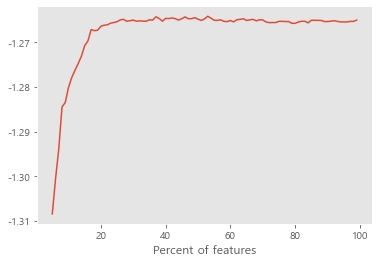

In [316]:
from sklearn.naive_bayes import GaussianNB
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = LGBMClassifier()

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_scaled, y)    
    cv_score = cross_val_score(model, X_new, y, scoring='neg_log_loss', cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [317]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_scaled, y)
X_train_select = fs.transform(X_train_scaled)
X_test_select = fs.transform(X_test_scaled)

In [318]:
XX_train_nothuman=X_train_scaled.copy()
XX_test_nothuman=X_test_scaled.copy()

In [319]:
print(X_train_select.shape)
print(XX_train_nothuman.columns[fs.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(150000, 239)
['주구매상품명_가구', '주구매상품명_건강식품', '주구매상품명_계절가전', '주구매상품명_과일', '주구매상품명_구기/필드스포츠', '주구매상품명_남성의류', '주구매상품명_냉동식품', '주구매상품명_냉장/세탁가전', '주구매상품명_냉장식품', '주구매상품명_모바일', '주구매상품명_문구/사무용품', '주구매상품명_상품권', '주구매상품명_생활/주방가전', '주구매상품명_세제/위생', '주구매상품명_속옷/양말/홈웨어', '주구매상품명_스포츠패션', '주구매상품명_시즌스포츠', '주구매상품명_식기/조리기구', '주구매상품명_아웃도어/레저', '주구매상품명_여성의류', '주구매상품명_영상/음향가전', '주구매상품명_완구', '주구매상품명_원예/애완', '주구매상품명_유아동의류', '주구매상품명_음료', '주구매상품명_자동차용품', '주구매상품명_주방잡화', '주구매상품명_청소/세탁/욕실용품', '주구매상품명_축산물', '주구매상품명_출산/육아용품', '주구매상품명_침구/수예', '주구매상품명_컴퓨터', '주구매상품명_패션잡화', '주구매상품명_퍼스널케어', '주구매상품명_헬스/피트니스', '주구매상품명_화장품/뷰티케어', '주구매상품명_BusanBusan', '주구매상품명_Chungcheongbuk-doCheongju-si', '주구매상품명_Chungcheongbuk-doCheongwon-gun', '주구매상품명_Chungcheongbuk-doDanyang-gun', '주구매상품명_Chungcheongbuk-doJeungpyeong-gun', '주구매상품명_Chungcheongnam-doAsan-si', '주구매상품명_Chungcheongnam-doCheonan-si', '주구매상품명_Chungcheongnam-doCheongyang-gun', '주구매상품명_Chungcheongnam-doDangjin-si', '주구매상품명_Chungcheongnam-doGongju-si', '주구매상품명_Chungcheongnam-doGyeryong

In [325]:
X_train_select=pd.DataFrame(X_train_select,columns=XX_train_nothuman.columns[fs.get_support()])
X_test_select=pd.DataFrame(X_test_select,columns=XX_train_nothuman.columns[fs.get_support()])

In [328]:
from sklearn.model_selection import train_test_split

X_train, valid_x, y_train, valid_y = train_test_split(X_train_select, y, test_size=0.3, random_state=42)

In [392]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)

pred = model_tree.predict(valid_x)
score = log_loss(valid_y,pred)

print("log_loss : ", score)

ValueError: could not convert string to float: 'F40'

In [91]:
from sklearn.model_selection import GridSearchCV

model_dt = DecisionTreeClassifier(random_state = 42)

param_grid = {'criterion' :['gini','entropy'],  # 불순도 계산하는 척도
              'max_depth':[4,5,6,8,10],  # 깊이, 몇층까지 갈건지
              'min_samples_leaf':[3,5,10,50,100]}  # 한노드에 몇개의 샘플
# 2 * 5 * 5 = 50 번 반복

gcv = GridSearchCV(model_dt, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
gcv.fit(X_train,y_train)

print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수
print(gcv.score(valid_x,valid_y))           # 튜닝 하기 전보다 높은 수치

final params {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}
best score -1.3412307456974497
-1.3378987503470154


In [413]:
from sklearn.model_selection import RandomizedSearchCV

model_dt = DecisionTreeClassifier(random_state = 42)

param_grid={'criterion' :['gini','entropy'],
            'max_depth':[4,5,6,8,10],
            'min_samples_leaf':[3,5,10,50,100]}

rcv = RandomizedSearchCV(model_dt, param_distributions=param_grid, scoring='neg_log_loss', n_iter=8) # 8 번 반복
rcv.fit(X_train,y_train)

print('final params', rcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', rcv.best_score_)      # 최고의 점수
print(rcv.score(valid_x,valid_y))           # # 튜닝 하기 전보다 높은 수치

final params {'min_samples_leaf': 100, 'max_depth': 4, 'criterion': 'entropy'}
best score -1.3327804648429182
-1.3282340250638822


In [93]:
print('기존모델 성능 : ', model_tree.score(valid_x,valid_y))
print('grid_search 이용해 튜닝한 모델 성능 : ', gcv.score(valid_x, valid_y))
print('random_search 이용해 튜닝한 모델 성능 : ', rcv.score(valid_x, valid_y))

기존모델 성능 :  0.33842222222222224
grid_search 이용해 튜닝한 모델 성능 :  -1.3378987503470154
random_search 이용해 튜닝한 모델 성능 :  -1.3309156592847937


# 캣부스트 튜닝x + SHAP 피쳐임포턴스

In [ ]:
clf = CatBoostClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

Learning rate set to 0.100324
0:	learn: 1.7090904	total: 63.4ms	remaining: 1m 3s
1:	learn: 1.6467944	total: 113ms	remaining: 56.6s
2:	learn: 1.5975890	total: 168ms	remaining: 55.9s
3:	learn: 1.5548766	total: 224ms	remaining: 55.9s
4:	learn: 1.5201378	total: 280ms	remaining: 55.8s
5:	learn: 1.4916322	total: 330ms	remaining: 54.6s
6:	learn: 1.4677020	total: 380ms	remaining: 53.9s
7:	learn: 1.4464772	total: 430ms	remaining: 53.4s
8:	learn: 1.4296132	total: 478ms	remaining: 52.7s
9:	learn: 1.4149747	total: 541ms	remaining: 53.6s
10:	learn: 1.4026934	total: 594ms	remaining: 53.4s
11:	learn: 1.3921219	total: 640ms	remaining: 52.7s
12:	learn: 1.3816753	total: 698ms	remaining: 53s
13:	learn: 1.3728748	total: 747ms	remaining: 52.6s
14:	learn: 1.3650990	total: 806ms	remaining: 52.9s
15:	learn: 1.3586711	total: 869ms	remaining: 53.4s
16:	learn: 1.3524646	total: 950ms	remaining: 54.9s
17:	learn: 1.3468014	total: 1s	remaining: 54.7s
18:	learn: 1.3423601	total: 1.05s	remaining: 54.4s
19:	learn: 1.33

160:	learn: 1.2587989	total: 8.34s	remaining: 43.5s
161:	learn: 1.2585838	total: 8.4s	remaining: 43.5s
162:	learn: 1.2584313	total: 8.45s	remaining: 43.4s
163:	learn: 1.2582368	total: 8.5s	remaining: 43.3s
164:	learn: 1.2580055	total: 8.56s	remaining: 43.3s
165:	learn: 1.2577998	total: 8.61s	remaining: 43.2s
166:	learn: 1.2575907	total: 8.68s	remaining: 43.3s
167:	learn: 1.2574374	total: 8.72s	remaining: 43.2s
168:	learn: 1.2572603	total: 8.77s	remaining: 43.1s
169:	learn: 1.2570763	total: 8.82s	remaining: 43.1s
170:	learn: 1.2569135	total: 8.88s	remaining: 43s
171:	learn: 1.2567071	total: 8.93s	remaining: 43s
172:	learn: 1.2564813	total: 8.99s	remaining: 43s
173:	learn: 1.2562871	total: 9.04s	remaining: 42.9s
174:	learn: 1.2561289	total: 9.09s	remaining: 42.9s
175:	learn: 1.2559474	total: 9.14s	remaining: 42.8s
176:	learn: 1.2557531	total: 9.19s	remaining: 42.7s
177:	learn: 1.2555183	total: 9.24s	remaining: 42.7s
178:	learn: 1.2552941	total: 9.29s	remaining: 42.6s
179:	learn: 1.255044

319:	learn: 1.2318220	total: 16.9s	remaining: 35.8s
320:	learn: 1.2316661	total: 16.9s	remaining: 35.8s
321:	learn: 1.2315204	total: 17s	remaining: 35.7s
322:	learn: 1.2314310	total: 17s	remaining: 35.7s
323:	learn: 1.2313185	total: 17.1s	remaining: 35.6s
324:	learn: 1.2311635	total: 17.1s	remaining: 35.5s
325:	learn: 1.2310466	total: 17.2s	remaining: 35.5s
326:	learn: 1.2308880	total: 17.2s	remaining: 35.4s
327:	learn: 1.2307982	total: 17.3s	remaining: 35.4s
328:	learn: 1.2306935	total: 17.3s	remaining: 35.3s
329:	learn: 1.2304441	total: 17.4s	remaining: 35.3s
330:	learn: 1.2302694	total: 17.4s	remaining: 35.2s
331:	learn: 1.2301198	total: 17.5s	remaining: 35.1s
332:	learn: 1.2300044	total: 17.5s	remaining: 35.1s
333:	learn: 1.2298274	total: 17.6s	remaining: 35.1s
334:	learn: 1.2296332	total: 17.6s	remaining: 35s
335:	learn: 1.2294754	total: 17.7s	remaining: 34.9s
336:	learn: 1.2293716	total: 17.7s	remaining: 34.9s
337:	learn: 1.2292651	total: 17.8s	remaining: 34.8s
338:	learn: 1.2291

478:	learn: 1.2113177	total: 25.4s	remaining: 27.6s
479:	learn: 1.2111354	total: 25.5s	remaining: 27.6s
480:	learn: 1.2110136	total: 25.5s	remaining: 27.5s
481:	learn: 1.2108901	total: 25.6s	remaining: 27.5s
482:	learn: 1.2107660	total: 25.6s	remaining: 27.4s
483:	learn: 1.2106205	total: 25.7s	remaining: 27.4s
484:	learn: 1.2105662	total: 25.7s	remaining: 27.3s
485:	learn: 1.2104262	total: 25.8s	remaining: 27.3s
486:	learn: 1.2103412	total: 25.8s	remaining: 27.2s
487:	learn: 1.2101935	total: 25.9s	remaining: 27.2s
488:	learn: 1.2100679	total: 25.9s	remaining: 27.1s
489:	learn: 1.2099640	total: 26s	remaining: 27s
490:	learn: 1.2098810	total: 26s	remaining: 27s
491:	learn: 1.2097998	total: 26.1s	remaining: 26.9s
492:	learn: 1.2096679	total: 26.1s	remaining: 26.9s
493:	learn: 1.2095123	total: 26.2s	remaining: 26.8s
494:	learn: 1.2093639	total: 26.3s	remaining: 26.8s
495:	learn: 1.2091996	total: 26.3s	remaining: 26.7s
496:	learn: 1.2090860	total: 26.4s	remaining: 26.7s
497:	learn: 1.208936

637:	learn: 1.1923901	total: 34s	remaining: 19.3s
638:	learn: 1.1922591	total: 34.1s	remaining: 19.3s
639:	learn: 1.1921126	total: 34.2s	remaining: 19.2s
640:	learn: 1.1919583	total: 34.2s	remaining: 19.2s
641:	learn: 1.1918258	total: 34.3s	remaining: 19.1s
642:	learn: 1.1916621	total: 34.3s	remaining: 19.1s
643:	learn: 1.1915405	total: 34.4s	remaining: 19s
644:	learn: 1.1914253	total: 34.4s	remaining: 18.9s
645:	learn: 1.1913576	total: 34.5s	remaining: 18.9s
646:	learn: 1.1912323	total: 34.5s	remaining: 18.8s
647:	learn: 1.1911559	total: 34.6s	remaining: 18.8s
648:	learn: 1.1910233	total: 34.7s	remaining: 18.7s
649:	learn: 1.1908791	total: 34.7s	remaining: 18.7s
650:	learn: 1.1907707	total: 34.8s	remaining: 18.6s
651:	learn: 1.1906229	total: 34.8s	remaining: 18.6s
652:	learn: 1.1904949	total: 34.9s	remaining: 18.5s
653:	learn: 1.1903776	total: 34.9s	remaining: 18.5s
654:	learn: 1.1902965	total: 35s	remaining: 18.4s
655:	learn: 1.1901681	total: 35s	remaining: 18.4s
656:	learn: 1.190069

796:	learn: 1.1747255	total: 42.3s	remaining: 10.8s
797:	learn: 1.1745644	total: 42.3s	remaining: 10.7s
798:	learn: 1.1744306	total: 42.4s	remaining: 10.7s
799:	learn: 1.1743500	total: 42.5s	remaining: 10.6s
800:	learn: 1.1742755	total: 42.5s	remaining: 10.6s
801:	learn: 1.1741679	total: 42.6s	remaining: 10.5s
802:	learn: 1.1740502	total: 42.6s	remaining: 10.5s
803:	learn: 1.1738895	total: 42.7s	remaining: 10.4s
804:	learn: 1.1737336	total: 42.7s	remaining: 10.3s
805:	learn: 1.1735781	total: 42.8s	remaining: 10.3s
806:	learn: 1.1734734	total: 42.8s	remaining: 10.2s
807:	learn: 1.1733335	total: 42.9s	remaining: 10.2s
808:	learn: 1.1732962	total: 42.9s	remaining: 10.1s
809:	learn: 1.1732207	total: 43s	remaining: 10.1s
810:	learn: 1.1730485	total: 43s	remaining: 10s
811:	learn: 1.1729543	total: 43.1s	remaining: 9.98s
812:	learn: 1.1727898	total: 43.1s	remaining: 9.92s
813:	learn: 1.1726805	total: 43.2s	remaining: 9.87s
814:	learn: 1.1726013	total: 43.2s	remaining: 9.82s
815:	learn: 1.1725

955:	learn: 1.1584033	total: 50.6s	remaining: 2.33s
956:	learn: 1.1582915	total: 50.7s	remaining: 2.28s
957:	learn: 1.1581489	total: 50.8s	remaining: 2.23s
958:	learn: 1.1580370	total: 50.8s	remaining: 2.17s
959:	learn: 1.1579102	total: 50.9s	remaining: 2.12s
960:	learn: 1.1578110	total: 50.9s	remaining: 2.07s
961:	learn: 1.1577149	total: 51s	remaining: 2.01s
962:	learn: 1.1576224	total: 51s	remaining: 1.96s
963:	learn: 1.1575731	total: 51.1s	remaining: 1.91s
964:	learn: 1.1574765	total: 51.1s	remaining: 1.85s
965:	learn: 1.1573466	total: 51.2s	remaining: 1.8s
966:	learn: 1.1572247	total: 51.2s	remaining: 1.75s
967:	learn: 1.1571372	total: 51.3s	remaining: 1.69s
968:	learn: 1.1570709	total: 51.3s	remaining: 1.64s
969:	learn: 1.1569820	total: 51.4s	remaining: 1.59s
970:	learn: 1.1568873	total: 51.4s	remaining: 1.53s
971:	learn: 1.1568081	total: 51.5s	remaining: 1.48s
972:	learn: 1.1567290	total: 51.5s	remaining: 1.43s
973:	learn: 1.1566711	total: 51.6s	remaining: 1.38s
974:	learn: 1.156

In [ ]:
print(clf.score(X_train,y_train))
print(clf.score(valid_x,valid_y))

0.5293142857142857
0.4633333333333333


In [ ]:
pred=pd.DataFrame(clf.predict_proba(X_test_scaled))
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝정복해조_3번째 제출.csv',index=False)

In [ ]:
result

,CLNT_ID,F20,F30,F40,M20,M30,M40
0,2,0.093049,0.391915,0.341758,0.009698,0.071998,0.091582
1,3,0.344742,0.268720,0.212240,0.067175,0.044197,0.062926
2,10,0.040275,0.237853,0.446816,0.014657,0.134643,0.125757
3,15,0.019506,0.524837,0.396115,0.001429,0.025542,0.032572
4,29,0.572542,0.266965,0.111011,0.025694,0.011064,0.012724
...,...,...,...,...,...,...,...
113099,263089,0.172372,0.336773,0.447313,0.010675,0.008373,0.024493
113100,263097,0.141507,0.311357,0.433734,0.013492,0.040572,0.059337
113101,263098,0.033251,0.361212,0.356424,0.026938,0.083634,0.138540
113102,263099,0.149543,0.442854,0.150825,0.095199,0.079367,0.082212


[10:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


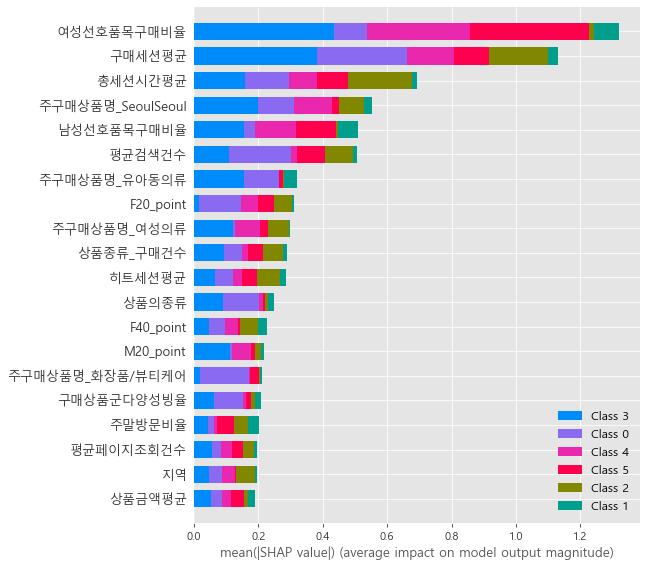

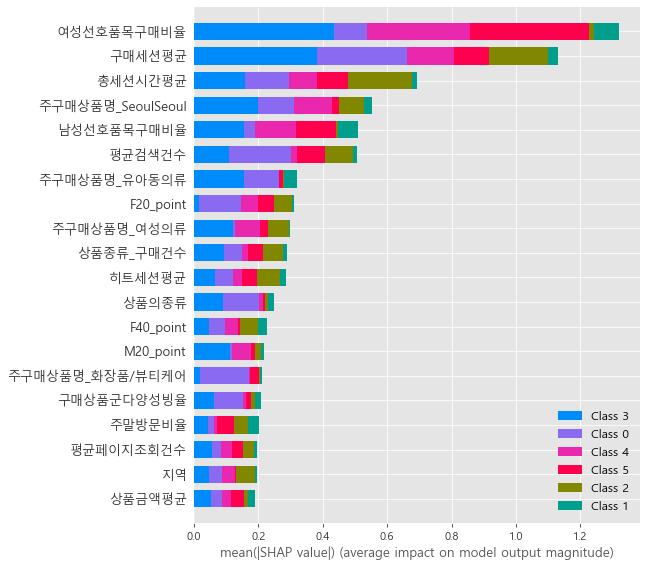

In [329]:
#SHAP로 피쳐임포턴스 확인
import shap


X_importance = X_test_select

model = XGBClassifier(random_state=0).fit(X_train_select, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)


#model = LGBMRegressor(random_state=0).fit(X_train_scaled, y)
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

#shap_sum = np.abs(shap_values).mean(axis=0)
#importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
#importance_df.columns = ['column_name', 'shap_importance']
#importance_df = importance_df.sort_values('shap_importance', ascending=False)
#importance_df

# LGBM 모델링, 피쳐중요도 확인

In [ ]:
model=LGBMClassifier(randomstate=0)

In [ ]:
model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: randomstate


LGBMClassifier(randomstate=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

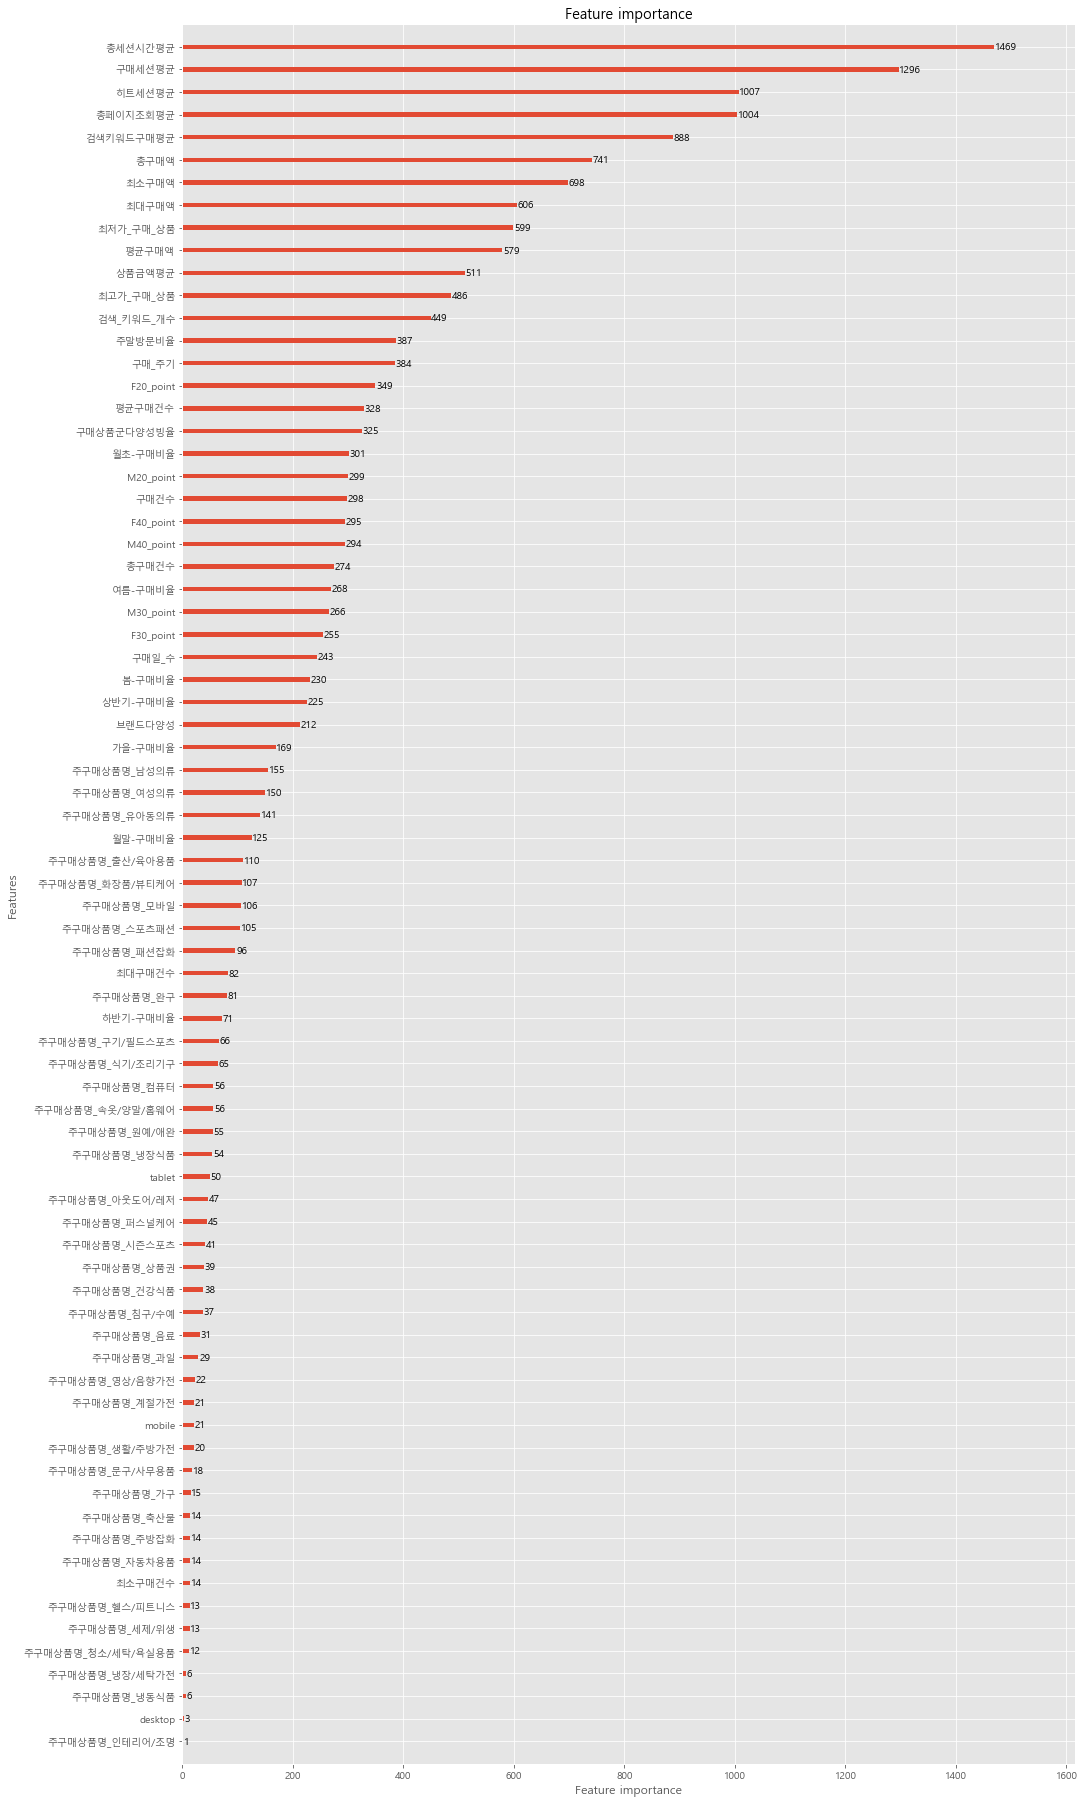

In [ ]:
from lightgbm import plot_importance
plot_importance(model, figsize=(16, 32), max_num_features=100)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(valid_x, valid_y))

pred=pd.DataFrame(model.predict_proba(X_test_scaled))
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝정복해조_1번째 제출.csv',index=False)

0.5167142857142857
0.4613555555555556


# LR 모델링

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y)
print(model_lr.score(X_train_scaled, y))

# 테스트 데이터 예측
pred = pd.DataFrame(model_lr.predict_proba(X_test_scaled))

# 결과값 정제 및 내보내기
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

# result.to_csv('조이름_x번째 제출.csv',index=False)

0.4482333333333333


,CLNT_ID,F20,F30,F40,M20,M30,M40
0,2,0.099259,0.335523,0.389777,0.022558,0.057979,0.094905
1,3,0.139374,0.385837,0.358701,0.019331,0.038988,0.057769
2,10,0.061754,0.292432,0.344973,0.037407,0.128138,0.135296
3,15,0.008466,0.347389,0.616108,0.000044,0.003752,0.024241
4,29,0.505431,0.352847,0.110778,0.012275,0.009744,0.008926
...,...,...,...,...,...,...,...
113099,263089,0.180659,0.438371,0.325314,0.007207,0.019326,0.029122
113100,263097,0.080810,0.361645,0.420148,0.006610,0.053279,0.077509
113101,263098,0.077311,0.370964,0.305158,0.024438,0.105700,0.116428
113102,263099,0.160225,0.364122,0.127226,0.155595,0.139221,0.053611


# 베이지안 활용 하이퍼파라미터튜닝 - 3주차 과제

In [343]:
X_train_select.replace([np.inf,-np.inf],np.nan,inplace=True)
X_test_select.replace([np.inf,-np.inf],np.nan,inplace=True)

In [345]:
X_train_select.fillna(0,inplace=True)
X_test_select.fillna(0,inplace=True)

In [346]:
Bay_opt_clfs = [] # 모델별 최고 성능 저장용 빈 리스트 생성
from bayes_opt import BayesianOptimization

In [415]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (100, 2000),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,64),
            'min_child_weight': (1, 10),
            'scale_pos_weight': (1,2)}

def LGBM_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight,scale_pos_weight):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'is_unbalance' : True,
        'scale_pos_weight' : scale_pos_weight,
        'n_jobs' : -1
    }
    LGBM = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , random_state=50)
    score = cross_val_score(LGBM, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_LGBM = BayesianOptimization(f = LGBM_opt, pbounds = pbounds, random_state=0)

In [349]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (100, 2000),
            'max_depth': (3,10),   
            'subsample': (0.8,0.95), 
            'colsample_bytree': (0.75,0.9),   
            'num_leaves': (2,64),
            'min_child_weight': (1, 10),
            'scale_pos_weight': (1,2)}

def LGBM_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight,scale_pos_weight):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        #'is_unbalance' : True,
        'scale_pos_weight' : scale_pos_weight,
        'n_jobs' : -1
    }
    LGBM = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , random_state=50)
    score = cross_val_score(LGBM, X_train, y_train, scoring='neg_log_loss', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_LGBM = BayesianOptimization(f = LGBM_opt, pbounds = pbounds, random_state=0)

In [ ]:
Bay_LGBM.maximize(init_points=50, n_iter=50)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  2        | -22.47    |  0.753    |  1.257    |  8.447    |  8.83     |  1.959e+0 |  51.55    |  1.461    |  0.9171   |
|  3        | -1.97     |  0.7677   |  0.9779   |  4.003    |  9.502    |  1.092e+0 |  27.71    |  1.265    |  0.9161   |
|  4        | -1.638    |  0.8184   |  0.8742   |  3.132    |  6.559    |  1.263e+0 |  40.25    |  1.944    |  0.9023   |
|  5        | -2.668    |  0.8039   |  0.6837   |  7.883    |  1.542    |  1.367e+0 |  43.58    |  1.21     |  0.8193   |
|  6        | -1.694    |  0.7973   |  0.5774   |  6.991    |  4.947    |  1.978e+0 |  8.327    |  1.209    |  0.8242   |
|  7        | -1.336    |  0.848    |  0.4173   |  6.264    |  3.2      |  402.0    |  8.843    |  1.656    |  0.8207   |
|  8        | -1.688    

|  42       | -1.652    |  0.7889   |  0.592    |  7.113    |  3.455    |  804.6    |  14.22    |  1.46     |  0.8067   |
|  43       | -1.51     |  0.87     |  0.1616   |  6.632    |  3.761    |  1.197e+0 |  61.48    |  1.646    |  0.8053   |
|  44       | -1.618    |  0.8146   |  0.7895   |  6.753    |  7.133    |  627.4    |  9.989    |  1.393    |  0.9435   |
|  45       | -22.12    |  0.7781   |  1.361    |  6.807    |  5.112    |  1.776e+0 |  30.43    |  1.724    |  0.8599   |
|  46       | -3.55     |  0.8856   |  1.051    |  7.897    |  3.949    |  1.538e+0 |  41.44    |  1.24     |  0.8241   |
|  47       | -23.7     |  0.8695   |  1.441    |  6.207    |  6.319    |  1.73e+03 |  30.35    |  1.952    |  0.8864   |
|  48       | -21.81    |  0.8731   |  1.368    |  8.709    |  2.435    |  1.295e+0 |  26.7     |  1.063    |  0.8636   |
|  49       | -19.93    |  0.7888   |  1.281    |  3.233    |  9.631    |  775.2    |  24.12    |  1.016    |  0.8278   |
|  50       | -22.44    

In [351]:
Bay_LGBM.max

{'target': -1.268972004263074,
 'params': {'colsample_bytree': 0.8594985843636087,
  'learning_rate': 0.29886303202908876,
  'max_depth': 6.647256243428905,
  'min_child_weight': 1.4890418950532827,
  'n_estimators': 479.9933973031601,
  'num_leaves': 3.1483512565580662,
  'scale_pos_weight': 1.7936977033574206,
  'subsample': 0.8335887032090571}}

In [352]:
max_params = Bay_LGBM.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params

{'colsample_bytree': 0.8594985843636087,
 'learning_rate': 0.29886303202908876,
 'max_depth': 7,
 'min_child_weight': 1.4890418950532827,
 'n_estimators': 480,
 'num_leaves': 3,
 'scale_pos_weight': 1.7936977033574206,
 'subsample': 0.8335887032090571}

In [407]:
Bay_opt_clfs=[]
LGBM_clf = LGBMClassifier(**max_params)

scores = cross_val_score(LGBM_clf, X_train, y_train, scoring='neg_log_loss', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((LGBM_clf.__class__.__name__, LGBM_clf, max(scores)))

[-1.26849118 -1.26961003 -1.26609275 -1.27169407]
최대성능: -1.2660927492374563
평균성능: -1.268972004263074


In [356]:
lgbm = LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8594985843636087, 
                      learning_rate=0.29886303202908876, 
                      max_depth=7, 
                      min_child_weight=1.4890418950532827, 
                      n_estimators=480, 
                      num_leaves = 3,
                      scale_pos_weight=1.7936977033574206,
                      subsample =0.8335887032090571)

In [364]:
lgbm.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.8594985843636087,
               learning_rate=0.29886303202908876, max_depth=7,
               min_child_weight=1.4890418950532827, n_estimators=480,
               num_leaves=3, random_state=0,
               scale_pos_weight=1.7936977033574206,
               subsample=0.8335887032090571)

In [393]:
pred = lgbm.predict_proba(valid_x)
score = log_loss(valid_y,pred)

In [400]:
X_train_select

,주구매상품명_가구,주구매상품명_건강식품,주구매상품명_계절가전,주구매상품명_과일,주구매상품명_구기/필드스포츠,주구매상품명_남성의류,주구매상품명_냉동식품,주구매상품명_냉장/세탁가전,주구매상품명_냉장식품,주구매상품명_모바일,...,주거지_Jeollanam-doWando-gun,주거지_Jeollanam-doYeosu-si,주거지_SeoulSeoul,주거지_UlsanUlsan,상품종류_브랜드,상품종류_구매건수,여성선호품목구매건수,남성선호품목구매건수,여성선호품목구매비율,남성선호품목구매비율
0,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,-0.174548,1.359156,-0.884339,-0.40691,-0.908359,-0.377444
1,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,1.286489,-0.137517,-0.012801,-0.271289,1.230381,-0.40691,0.625479,-0.377444
2,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,-0.156545,-0.038369,-0.884339,-0.40691,-0.908359,-0.377444
3,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,-0.183553,-0.271289,-0.884339,-0.40691,-0.908359,-0.377444
4,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,0.166179,-0.271289,0.084535,-0.40691,-0.754975,-0.377444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,1.286489,-0.137517,-0.188056,1.359156,-0.884339,-0.40691,-0.908359,-0.377444
149996,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,-0.174548,-0.597378,0.695826,-0.40691,1.545782,-0.377444
149997,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,-0.777309,-0.137517,-0.165546,1.359156,-0.884339,-0.40691,-0.908359,-0.377444
149998,-0.095618,-0.186998,-0.058924,-0.074503,-0.08508,-0.335908,-0.047027,-0.039528,-0.056362,-0.07567,...,-0.0188,-0.05343,1.286489,-0.137517,-0.188056,-1.684342,-0.884339,-0.40691,-0.908359,-0.377444


In [422]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(X_train_select):
    
    train_x = X_train_select.iloc[train_idx, :]
    train_y = y[train_idx]
    val_x = X_train_select.iloc[val_idx, :]
    val_y = y[val_idx]
    
    model = LGBMClassifier(random_state = 0, 
                      colsample_bytree=0.8594985843636087, 
                      learning_rate=0.29886303202908876, 
                      max_depth=7, 
                      min_child_weight=1.4890418950532827, 
                      n_estimators=480, 
                      num_leaves = 3,
                      scale_pos_weight=1.7936977033574206,
                      objective = 'multiclass',
                      num_class = 6,
                      metric = 'multi_logloss',
                      subsample =0.8335887032090571)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["multi_logloss"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[345]	valid_0's multi_logloss: 1.26628
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[467]	valid_0's multi_logloss: 1.26418
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[480]	valid_0's multi_logloss: 1.25461
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[328]	valid_0's multi_logloss: 1.26367
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[480]	valid_0's multi_logloss: 1.25839
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[337]	valid_0's multi_logloss: 1.26114
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration 

In [424]:
result = []
for i in models:
    result.append(i.predict_proba(X_test_select))
predict = np.mean(result, axis = 0)

In [427]:
pd.DataFrame(predict)

,0,1,2,3,4,5
0,0.080479,0.354627,0.417057,0.010680,0.039254,0.097903
1,0.262362,0.376407,0.253772,0.029004,0.035153,0.043302
2,0.066425,0.323691,0.362785,0.022962,0.097954,0.126183
3,0.013882,0.433307,0.393456,0.000752,0.023821,0.134782
4,0.445762,0.352747,0.126247,0.033424,0.019417,0.022402
...,...,...,...,...,...,...
113099,0.183844,0.379175,0.384487,0.007344,0.017822,0.027329
113100,0.131285,0.339304,0.475654,0.001588,0.022426,0.029743
113101,0.033485,0.424815,0.455276,0.006507,0.023958,0.055960
113102,0.209497,0.544180,0.148518,0.040150,0.035656,0.021999


In [428]:
pred=pd.DataFrame(predict)
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

#result.to_csv('머신러닝정복해조_1번째 제출.csv',index=False)

,CLNT_ID,F20,F30,F40,M20,M30,M40
0,2,0.080479,0.354627,0.417057,0.010680,0.039254,0.097903
1,3,0.262362,0.376407,0.253772,0.029004,0.035153,0.043302
2,10,0.066425,0.323691,0.362785,0.022962,0.097954,0.126183
3,15,0.013882,0.433307,0.393456,0.000752,0.023821,0.134782
4,29,0.445762,0.352747,0.126247,0.033424,0.019417,0.022402
...,...,...,...,...,...,...,...
113099,263089,0.183844,0.379175,0.384487,0.007344,0.017822,0.027329
113100,263097,0.131285,0.339304,0.475654,0.001588,0.022426,0.029743
113101,263098,0.033485,0.424815,0.455276,0.006507,0.023958,0.055960
113102,263099,0.209497,0.544180,0.148518,0.040150,0.035656,0.021999


## 수민씨 모델링

In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
skf = StratifiedKFold(n_splits=4 , shuffle=False) 

In [59]:
#randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model_dt = DecisionTreeClassifier(random_state = 42)

param_grid={'criterion' :['gini','entropy'],
            'max_depth':[4,5,6,8,10],
            'min_samples_leaf':[3,5,10,50,100]}

rcv = RandomizedSearchCV(model_dt, param_distributions=param_grid,cv=skf, scoring='neg_log_loss', n_iter=8) # 8 번 반복
rcv.fit(X_train,y_train)

print('final params', rcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', -(rcv.best_score_))      # 최고의 점수
print(-(rcv.score(valid_x,valid_y)))          # # 튜닝 하기 전보다 높은 수치

final params {'min_samples_leaf': 50, 'max_depth': 6, 'criterion': 'gini'}
best score 1.3309712704118586
1.3204636072954998


In [60]:
pred=pd.DataFrame(rcv.predict_proba(X_test_scaled))
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝정복해조_2번째 제출.csv',index=False)

# LR 하이퍼파라미터 튜닝

In [ ]:
pbounds = { 'C': (0.1,1),}


def LR_opt(C):
    params = {
        'C' : C
    }

    LR = LogisticRegression(**params, n_jobs=-1, random_state=50)
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    score = cross_val_score(LR, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    
    return np.mean(score)


Bay_LR = BayesianOptimization(f = LR_opt, pbounds = pbounds, random_state=0)

In [ ]:
Bay_LR.maximize(init_points=50, n_iter=50)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.4479   |  0.5939   |
|  2        |  0.4479   |  0.7437   |
|  3        |  0.4479   |  0.6425   |
|  4        |  0.4478   |  0.5904   |
|  5        |  0.4479   |  0.4813   |
|  6        |  0.4479   |  0.6813   |
|  7        |  0.4478   |  0.4938   |
|  8        |  0.4478   |  0.9026   |
|  9        |  0.4478   |  0.9673   |
|  10       |  0.4478   |  0.4451   |
|  11       |  0.4478   |  0.8126   |
|  12       |  0.4479   |  0.576    |
|  13       |  0.4478   |  0.6112   |
|  14       |  0.4478   |  0.933    |
|  15       |  0.4479   |  0.1639   |
|  16       |  0.4479   |  0.1784   |
|  17       |  0.4478   |  0.1182   |
|  18       |  0.4478   |  0.8494   |
|  19       |  0.4479   |  0.8003   |
|  20       |  0.4479   |  0.883    |
|  21       |  0.4478   |  0.9808   |
|  22       |  0.4478   |  0.8192   |
|  23       |  0.4479   |  0.5153   |
|  24       |  0.4478   |  0.8025   |
|  25       

In [ ]:
Bay_LR.max

{'target': 0.44793333333333335, 'params': {'C': 0.8830109334221372}}

In [ ]:
max_params = Bay_LR.max['params']

max_params

{'C': 0.8830109334221372}

In [ ]:
skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=0)

LR_clf = LogisticRegression(**max_params,  n_jobs=-1, random_state=0)

scores = cross_val_score(LR_clf, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((LR_clf.__class__.__name__, LR_clf, max(scores)))

[0.4464381  0.4511619  0.44731429 0.44681905]
최대성능: 0.45116190476190476
평균성능: 0.44793333333333335


# XGB 하이퍼파라미터튜닝

In [ ]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 100),
            'max_depth': (5,15),   
            'subsample': (0.8,0.95),  
            'colsample': (0.75,0.95),   
            'gamma': (0, 5)}


def XGB_opt(learning_rate, n_estimators, max_depth, subsample, colsample, gamma):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample,   
        'gamma': gamma,
        'n_jobs' : -1
    }
    XGB = XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    score = cross_val_score(XGB, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_XGB = BayesianOptimization(f = XGB_opt, pbounds = pbounds, random_state=0)

In [ ]:
Bay_XGB.maximize(init_points=50, n_iter=50)

In [ ]:
Bay_XGB.max

In [ ]:
max_params = Bay_XGB.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params

In [ ]:
XGB_clf = XGBClassifier(**max_params)

scores = cross_val_score(XGB_clf, X_train, y_train, scoring='roc_auc', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((XGB_clf.__class__.__name__, XGB_clf, max(scores)))

In [ ]:
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 250),
            'max_depth': (3,16),   
            'subsample': (0.5,1), 
            'colsample_bytree': (0.4,0.9),   
            'num_leaves': (2,15),
            'min_child_weight': (1, 10)}

def LGBM_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, num_leaves, min_child_weight):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1
    }
    LGBM = LGBMClassifier(**params)
    skf = StratifiedKFold(n_splits=4 , shuffle=False, random_state=50)
    score = cross_val_score(LGBM, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    
    return np.mean(score)

Bay_LGBM = BayesianOptimization(f = LGBM_opt, pbounds = pbounds, random_state=0)

In [ ]:
Bay_LGBM.maximize(init_points=5, n_iter=25)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.3453   |  0.8459   |  1.447    |  7.985    |  8.126    |  155.8    |  9.385    |  0.9628   |
|  2        |  0.4592   |  0.4355   |  0.1763   |  3.263    |  8.494    |  205.6    |  13.31    |  0.9893   |
|  3        |  0.4502   |  0.7996   |  0.7191   |  13.15    |  2.064    |  178.0    |  3.864    |  0.9723   |
|  4        |  0.4429   |  0.6609   |  0.6513   |  6.439    |  7.968    |  141.2    |  9.39     |  0.5094   |
|  5        |  0.4311   |  0.7088   |  0.9375   |  11.02    |  9.494    |  186.4    |  6.674    |  0.7185   |
|  6        |  0.4559   |  0.7488   |  0.1373   |  11.67    |  7.036    |  92.08    |  3.676    |  0.6577   |
|  7        |  0.4508   |  0.5819   |  0.8768   |  8.702    |  9.895    |  70.41    |  4.715    |  0.5807   |
|  8      

|  45       |  0.4458   |  0.5227   |  0.6598   |  10.25    |  8.745    |  195.4    |  5.514    |  0.5657   |
|  46       |  0.4425   |  0.4277   |  0.4873   |  6.408    |  5.105    |  186.7    |  11.04    |  0.6418   |
|  47       |  0.4514   |  0.59     |  0.3127   |  13.25    |  1.512    |  189.4    |  12.12    |  0.8887   |
|  48       |  0.4531   |  0.5297   |  0.592    |  10.64    |  3.455    |  124.2    |  4.562    |  0.7299   |
|  49       |  0.3671   |  0.4223   |  1.21     |  4.0      |  5.67     |  111.4    |  9.508    |  0.9797   |
|  50       |  0.4598   |  0.7228   |  0.1013   |  8.595    |  5.59     |  157.2    |  10.86    |  0.6388   |
|  51       |  0.4358   |  0.4644   |  0.6194   |  15.43    |  2.684    |  230.8    |  9.069    |  0.7285   |
|  52       |  0.4244   |  0.841    |  0.715    |  12.41    |  4.591    |  230.8    |  10.97    |  0.8498   |
|  53       |  0.4273   |  0.5639   |  1.147    |  11.27    |  3.16     |  82.11    |  12.35    |  0.9796   |
|  54     

In [ ]:
Bay_LGBM.max

{'target': 0.4600190476190476,
 'params': {'colsample_bytree': 0.8489808479646904,
  'learning_rate': 0.05,
  'max_depth': 9.034921595060643,
  'min_child_weight': 5.547920633497183,
  'n_estimators': 158.8478461753071,
  'num_leaves': 10.85845992309061,
  'subsample': 0.5}}

In [ ]:
max_params = Bay_LGBM.max['params']

max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params['num_leaves'] = int(round(max_params['num_leaves']))

max_params

{'colsample_bytree': 0.8489808479646904,
 'learning_rate': 0.05,
 'max_depth': 9,
 'min_child_weight': 5.547920633497183,
 'n_estimators': 159,
 'num_leaves': 11,
 'subsample': 0.5}

In [ ]:
LGBM_clf = LGBMClassifier(**max_params)

scores = cross_val_score(LGBM_clf, X_train, y_train, scoring='accuracy', cv=4, n_jobs=-1)

print(scores)
print(f'최대성능: {max(scores)}\n평균성능: {np.mean(scores)}')

Bay_opt_clfs.append((LGBM_clf.__class__.__name__, LGBM_clf, max(scores)))

Bay_opt_clfs

[0.45946667 0.46201905 0.45969524 0.46121905]
최대성능: 0.4620190476190476
평균성능: 0.4606


[('LGBMClassifier',
  LGBMClassifier(colsample_bytree=0.7606554087296831,
                 learning_rate=0.17633748456723403, max_depth=3,
                 min_child_weight=5.995719073287628, n_estimators=206,
                 num_leaves=9, subsample=0.9467927513349146),
  0.4614857142857143),
 ('LogisticRegression',
  LogisticRegression(C=0.8830109334221372, n_jobs=-1, random_state=0),
  0.45116190476190476),
 ('LGBMClassifier',
  LGBMClassifier(colsample_bytree=0.8489808479646904, learning_rate=0.05,
                 max_depth=9, min_child_weight=5.547920633497183,
                 n_estimators=159, num_leaves=11, subsample=0.5),
  0.4620190476190476)]

In [ ]:
lgbm = LGBMClassifier(random_state = 0, colsample_bytree=0.4600190476190476, learning_rate=0.05, max_depth=9, min_child_weight=5.547920633497183, n_estimators=158, num_leaves = 10, subsample =0.5)

lgbm.fit(X_train,y_train)

print(lgbm.score(X_train, y_train))
print(lgbm.score(valid_x, valid_y))

pred=pd.DataFrame(lgbm.predict_proba(X_test_scaled))
result = pd.concat([cust_te, pred], axis=1)
result.columns = ['CLNT_ID','F20','F30','F40','M20','M30','M40']
result

result.to_csv('머신러닝 정복해조_2번째 제출.csv',index=False)

0.4714285714285714
0.45835555555555557
